In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from utils.data_handling import *
from utils.sensor_optimisation import *
from parameters import *
import GPy
import scipy.stats
from sklearn.covariance import *
import time



import matplotlib.pyplot as plt
np.random.seed(101)




### Importing the Tracer Data to Select the Optimisation set S

In [4]:
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0, 'i_end': 988, 'crop': None, 'field_name': 'Tracer'}

In [5]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


### Working subset of the data : set S

In [6]:
S_human = human_level_subset(buildingshape, loc_df, 2,1 )
print("The remaining number of points is : ", str(len(S_human)))

The remaining number of points is :  37847


In [7]:
S_working = working_subset(data_df, loc_df, nbins = (25,25,25), threshold_sum = 10**-2 )
print("The remaining number of points is : ", str(len(S_working)))

The remaining number of points is :  57725


In [8]:
S = np.intersect1d(S_human,S_working)
print("The remaining number of points is : ", str(len(S)))

The remaining number of points is :  23643


In [9]:
#A_list = set_to_onehot(S,data_df.shape[0])
#save_vtu(ref_vtu[0],'FinalSelection',A_list)

### Import the Field of interest for computing the optimisation : TracerBackground / Pressure

In [10]:
parameters['i_end'] = 988
parameters['field_name'] = "Pressure"
parameters


{'i_start': 0, 'i_end': 988, 'crop': None, 'field_name': 'Pressure'}

In [11]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Pressure.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Pressure.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Pressure.pkl


In [12]:
X = loc_df.values[:,:] #[I,:dim]
Z = data_df.values[:,:] #[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Z.shape

(100040, 989)

### Sample Covariance

In [14]:
cov_emp = empirical_covariance(Z[S,:].T)

In [15]:
np.linalg.slogdet(cov_emp)

(1.0, -1399932.5637581607)

In [16]:
eig_emp = np.linalg.eigvalsh(cov_emp)
eig_emp[-1]

0.021915655570946678

In [17]:
eig_emp[0]

-6.773178779857725e-18

Text(0, 0.5, 'Eigenvalues $\\lambda_i$')

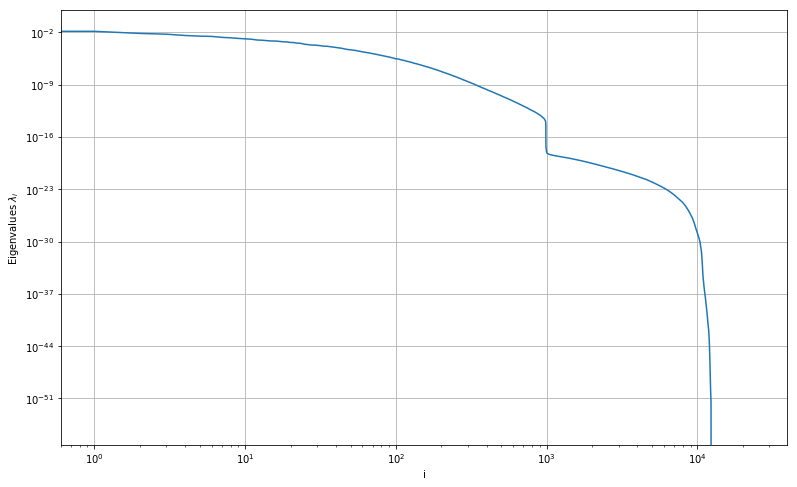

In [18]:
plt.figure(figsize=(13,8))
plt.loglog(eig_emp[::-1])
plt.grid()
plt.xlabel("i")
plt.ylabel("Eigenvalues $\lambda_i$")

### OAS Covariance

In [13]:
cov, shrinkage_coef = oas(Z[S,:].T)
cov.shape

(23643, 23643)

In [14]:
np.linalg.slogdet(cov)

(1.0, -31175.970532036714)

In [15]:
eig_oas = np.linalg.eigvalsh(cov)


In [16]:
eig_oas[0]

0.26088101418146015

Text(0, 0.5, 'Eigenvalues $\\lambda_i$')

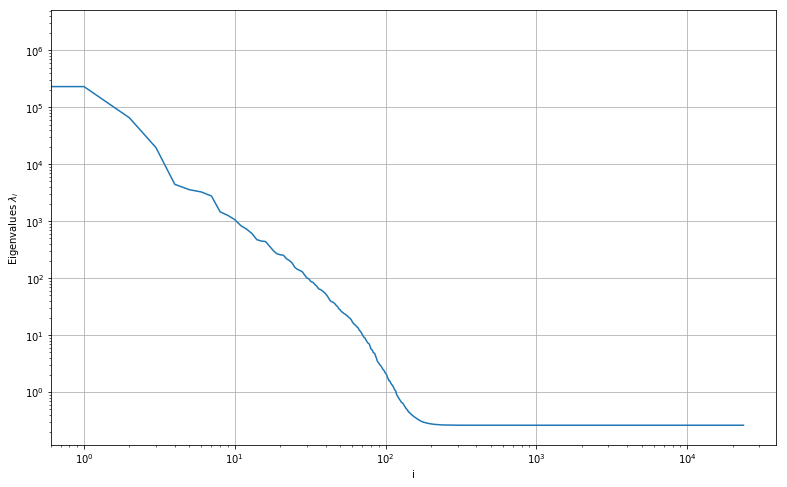

In [17]:
plt.figure(figsize=(13,8))
plt.loglog(eig_oas[::-1])
plt.grid()
plt.xlabel("i")
plt.ylabel("Eigenvalues $\lambda_i$")

### Sensor Optimisation with 3rd Algorithm : 


Define the Sets for the optimisation

In [18]:
sets = define_sets(S)

Number of sensors to place : 

In [19]:
k = 10

In [20]:
A_opt = {}

Truncation parameteter for the local covariance : 

In [29]:
epsilon = 150# 10**-6 # 10
print(epsilon)

150


In [ ]:
start = time.time()
A_opt['local_eps_72'] = sensor_loc_optimisation_naive_local(k,cov, "threshold", epsilon, sets)
end = time.time()





Init Loop:   0%|          | 0/23643 [00:00<?, ?it/s]



Init Loop:   0%|          | 7/23643 [00:00<12:19, 31.96it/s]



Init Loop:   0%|          | 8/23643 [00:00<33:44, 11.68it/s]



Init Loop:   0%|          | 10/23643 [00:00<30:34, 12.88it/s]



Init Loop:   0%|          | 14/23643 [00:00<24:48, 15.88it/s]



Init Loop:   0%|          | 18/23643 [00:00<20:40, 19.05it/s]



Init Loop:   0%|          | 22/23643 [00:00<17:31, 22.47it/s]



Init Loop:   0%|          | 25/23643 [00:01<19:32, 20.14it/s]



Init Loop:   0%|          | 28/23643 [00:01<23:32, 16.72it/s]



Init Loop:   0%|          | 32/23643 [00:01<20:37, 19.07it/s]



Init Loop:   0%|          | 35/23643 [00:04<2:19:09,  2.83it/s]



Init Loop:   0%|          | 37/23643 [00:04<1:55:06,  3.42it/s]



Init Loop:   0%|          | 39/23643 [00:06<2:55:09,  2.25it/s]



Init Loop:   0%|          | 43/23643 [00:06<2:05:50,  3.13it/s]



Init Loop:   0%|          | 46/23643 [00:06<1:32:54,  4.23it/s]



Init Loop:   0%|      

Init Loop:   4%|▍         | 1014/23643 [01:18<18:26, 20.45it/s]



Init Loop:   4%|▍         | 1019/23643 [01:18<16:06, 23.42it/s]



Init Loop:   4%|▍         | 1024/23643 [01:18<17:10, 21.96it/s]



Init Loop:   4%|▍         | 1028/23643 [01:18<17:36, 21.41it/s]



Init Loop:   4%|▍         | 1031/23643 [01:19<32:38, 11.55it/s]



Init Loop:   4%|▍         | 1034/23643 [01:19<31:35, 11.93it/s]



Init Loop:   4%|▍         | 1036/23643 [01:21<2:03:02,  3.06it/s]



Init Loop:   4%|▍         | 1040/23643 [01:21<1:29:20,  4.22it/s]



Init Loop:   4%|▍         | 1043/23643 [01:21<1:09:08,  5.45it/s]



Init Loop:   4%|▍         | 1046/23643 [01:22<1:13:17,  5.14it/s]



Init Loop:   4%|▍         | 1053/23643 [01:22<52:54,  7.12it/s]  



Init Loop:   4%|▍         | 1057/23643 [01:22<41:15,  9.12it/s]



Init Loop:   4%|▍         | 1062/23643 [01:22<31:14, 12.05it/s]



Init Loop:   5%|▍         | 1067/23643 [01:23<36:24, 10.33it/s]



Init Loop:   5%|▍         | 1073/23643 [01:23<28:05,

Init Loop:   8%|▊         | 1958/23643 [02:31<15:06, 23.92it/s]



Init Loop:   8%|▊         | 1962/23643 [02:31<16:09, 22.37it/s]



Init Loop:   8%|▊         | 1965/23643 [02:31<23:31, 15.36it/s]



Init Loop:   8%|▊         | 1971/23643 [02:31<19:50, 18.20it/s]



Init Loop:   8%|▊         | 1974/23643 [02:32<20:59, 17.20it/s]



Init Loop:   8%|▊         | 1977/23643 [02:32<22:37, 15.96it/s]



Init Loop:   8%|▊         | 1984/23643 [02:32<17:27, 20.68it/s]



Init Loop:   8%|▊         | 1989/23643 [02:33<25:38, 14.08it/s]



Init Loop:   8%|▊         | 1992/23643 [02:33<30:34, 11.80it/s]



Init Loop:   8%|▊         | 1995/23643 [02:33<30:48, 11.71it/s]



Init Loop:   8%|▊         | 2001/23643 [02:33<23:38, 15.25it/s]



Init Loop:   8%|▊         | 2004/23643 [02:34<23:03, 15.64it/s]



Init Loop:   8%|▊         | 2008/23643 [02:34<19:13, 18.76it/s]



Init Loop:   9%|▊         | 2012/23643 [02:34<19:31, 18.46it/s]



Init Loop:   9%|▊         | 2015/23643 [02:34<19:47, 18.21it/s

Init Loop:  12%|█▏        | 2881/23643 [03:52<53:07,  6.51it/s]  



Init Loop:  12%|█▏        | 2885/23643 [03:54<1:25:50,  4.03it/s]



Init Loop:  12%|█▏        | 2891/23643 [03:54<1:02:00,  5.58it/s]



Init Loop:  12%|█▏        | 2895/23643 [03:54<50:27,  6.85it/s]  



Init Loop:  12%|█▏        | 2902/23643 [03:54<36:48,  9.39it/s]



Init Loop:  12%|█▏        | 2907/23643 [03:54<29:00, 11.91it/s]



Init Loop:  12%|█▏        | 2911/23643 [03:54<23:58, 14.41it/s]



Init Loop:  12%|█▏        | 2919/23643 [03:54<18:14, 18.94it/s]



Init Loop:  12%|█▏        | 2924/23643 [03:55<19:18, 17.88it/s]



Init Loop:  12%|█▏        | 2931/23643 [03:55<14:59, 23.02it/s]



Init Loop:  12%|█▏        | 2936/23643 [03:55<13:57, 24.73it/s]



Init Loop:  12%|█▏        | 2941/23643 [03:55<14:26, 23.88it/s]



Init Loop:  12%|█▏        | 2948/23643 [03:55<11:39, 29.59it/s]



Init Loop:  12%|█▏        | 2953/23643 [03:56<12:59, 26.55it/s]



Init Loop:  13%|█▎        | 2957/23643 [03:56<12:05, 2

Init Loop:  16%|█▋        | 3858/23643 [05:03<1:28:28,  3.73it/s]



Init Loop:  16%|█▋        | 3860/23643 [05:03<1:11:20,  4.62it/s]



Init Loop:  16%|█▋        | 3862/23643 [05:03<55:05,  5.99it/s]  



Init Loop:  16%|█▋        | 3866/23643 [05:03<42:07,  7.82it/s]



Init Loop:  16%|█▋        | 3870/23643 [05:04<33:50,  9.74it/s]



Init Loop:  16%|█▋        | 3873/23643 [05:04<28:17, 11.65it/s]



Init Loop:  16%|█▋        | 3876/23643 [05:04<25:09, 13.09it/s]



Init Loop:  16%|█▋        | 3880/23643 [05:04<20:26, 16.12it/s]



Init Loop:  16%|█▋        | 3885/23643 [05:04<16:21, 20.12it/s]



Init Loop:  16%|█▋        | 3889/23643 [05:04<15:51, 20.77it/s]



Init Loop:  16%|█▋        | 3892/23643 [05:04<16:29, 19.97it/s]



Init Loop:  16%|█▋        | 3896/23643 [05:05<14:20, 22.94it/s]



Init Loop:  16%|█▋        | 3900/23643 [05:05<13:26, 24.48it/s]



Init Loop:  17%|█▋        | 3904/23643 [05:05<12:13, 26.90it/s]



Init Loop:  17%|█▋        | 3908/23643 [05:07<1:11:35,  

Init Loop:  20%|██        | 4806/23643 [06:23<36:25,  8.62it/s]



Init Loop:  20%|██        | 4810/23643 [06:24<28:10, 11.14it/s]



Init Loop:  20%|██        | 4815/23643 [06:24<21:48, 14.38it/s]



Init Loop:  20%|██        | 4819/23643 [06:24<20:27, 15.34it/s]



Init Loop:  20%|██        | 4822/23643 [06:24<19:10, 16.36it/s]



Init Loop:  20%|██        | 4826/23643 [06:24<16:12, 19.34it/s]



Init Loop:  20%|██        | 4830/23643 [06:24<13:57, 22.48it/s]



Init Loop:  20%|██        | 4835/23643 [06:24<11:40, 26.87it/s]



Init Loop:  20%|██        | 4840/23643 [06:25<10:33, 29.66it/s]



Init Loop:  20%|██        | 4844/23643 [06:25<10:55, 28.70it/s]



Init Loop:  21%|██        | 4848/23643 [06:25<10:18, 30.41it/s]



Init Loop:  21%|██        | 4853/23643 [06:25<09:20, 33.51it/s]



Init Loop:  21%|██        | 4860/23643 [06:25<08:02, 38.94it/s]



Init Loop:  21%|██        | 4865/23643 [06:26<15:44, 19.88it/s]



Init Loop:  21%|██        | 4869/23643 [06:26<18:09, 17.24it/s

Init Loop:  24%|██▍       | 5690/23643 [07:42<14:39, 20.41it/s]



Init Loop:  24%|██▍       | 5697/23643 [07:42<11:42, 25.54it/s]



Init Loop:  24%|██▍       | 5702/23643 [07:43<18:11, 16.43it/s]



Init Loop:  24%|██▍       | 5707/23643 [07:43<14:46, 20.24it/s]



Init Loop:  24%|██▍       | 5712/23643 [07:43<12:38, 23.63it/s]



Init Loop:  24%|██▍       | 5716/23643 [07:43<12:30, 23.89it/s]



Init Loop:  24%|██▍       | 5720/23643 [07:43<11:19, 26.37it/s]



Init Loop:  24%|██▍       | 5724/23643 [07:44<13:21, 22.35it/s]



Init Loop:  24%|██▍       | 5730/23643 [07:44<10:54, 27.39it/s]



Init Loop:  24%|██▍       | 5734/23643 [07:44<13:33, 22.01it/s]



Init Loop:  24%|██▍       | 5738/23643 [07:44<13:28, 22.16it/s]



Init Loop:  24%|██▍       | 5741/23643 [07:44<12:45, 23.39it/s]



Init Loop:  24%|██▍       | 5746/23643 [07:44<11:02, 27.03it/s]



Init Loop:  24%|██▍       | 5751/23643 [07:45<09:38, 30.91it/s]



Init Loop:  24%|██▍       | 5758/23643 [07:45<08:09, 36.53it/s

Init Loop:  26%|██▌       | 6150/23643 [08:29<46:04,  6.33it/s]  



Init Loop:  26%|██▌       | 6154/23643 [08:30<36:58,  7.88it/s]



Init Loop:  26%|██▌       | 6162/23643 [08:30<28:01, 10.40it/s]



Init Loop:  26%|██▌       | 6168/23643 [08:30<22:12, 13.11it/s]



Init Loop:  26%|██▌       | 6172/23643 [08:30<18:21, 15.86it/s]



Init Loop:  26%|██▌       | 6180/23643 [08:30<14:04, 20.68it/s]



Init Loop:  26%|██▌       | 6185/23643 [08:34<1:14:25,  3.91it/s]



Init Loop:  26%|██▌       | 6189/23643 [08:34<57:01,  5.10it/s]  



Init Loop:  26%|██▌       | 6193/23643 [08:34<42:21,  6.87it/s]



Init Loop:  26%|██▌       | 6196/23643 [08:37<1:51:38,  2.60it/s]



Init Loop:  26%|██▌       | 6199/23643 [08:37<1:23:38,  3.48it/s]



Init Loop:  26%|██▌       | 6201/23643 [08:38<1:11:42,  4.05it/s]



Init Loop:  26%|██▌       | 6203/23643 [08:38<57:49,  5.03it/s]  



Init Loop:  26%|██▋       | 6207/23643 [08:38<42:57,  6.77it/s]



Init Loop:  26%|██▋       | 6211/23643 [08:40<1:

Init Loop:  29%|██▉       | 6967/23643 [10:10<31:29,  8.83it/s]



Init Loop:  29%|██▉       | 6974/23643 [10:11<23:49, 11.66it/s]



Init Loop:  30%|██▉       | 6978/23643 [10:11<20:08, 13.79it/s]



Init Loop:  30%|██▉       | 6982/23643 [10:11<23:00, 12.07it/s]



Init Loop:  30%|██▉       | 6988/23643 [10:11<17:31, 15.83it/s]



Init Loop:  30%|██▉       | 6992/23643 [10:11<14:36, 18.99it/s]



Init Loop:  30%|██▉       | 6997/23643 [10:12<13:33, 20.46it/s]



Init Loop:  30%|██▉       | 7001/23643 [10:12<14:28, 19.17it/s]



Init Loop:  30%|██▉       | 7004/23643 [10:13<32:47,  8.46it/s]



Init Loop:  30%|██▉       | 7011/23643 [10:13<24:11, 11.46it/s]



Init Loop:  30%|██▉       | 7018/23643 [10:13<18:07, 15.29it/s]



Init Loop:  30%|██▉       | 7023/23643 [10:13<16:44, 16.54it/s]



Init Loop:  30%|██▉       | 7027/23643 [10:14<39:47,  6.96it/s]



Init Loop:  30%|██▉       | 7032/23643 [10:15<36:00,  7.69it/s]



Init Loop:  30%|██▉       | 7035/23643 [10:15<31:34,  8.76it/s

Init Loop:  33%|███▎      | 7895/23643 [11:33<08:07, 32.30it/s]



Init Loop:  33%|███▎      | 7900/23643 [11:33<08:17, 31.62it/s]



Init Loop:  33%|███▎      | 7904/23643 [11:34<08:38, 30.38it/s]



Init Loop:  33%|███▎      | 7909/23643 [11:34<07:47, 33.65it/s]



Init Loop:  33%|███▎      | 7913/23643 [11:38<1:31:31,  2.86it/s]



Init Loop:  33%|███▎      | 7916/23643 [11:38<1:09:25,  3.78it/s]



Init Loop:  33%|███▎      | 7919/23643 [11:38<52:41,  4.97it/s]  



Init Loop:  34%|███▎      | 7923/23643 [11:41<1:20:32,  3.25it/s]



Init Loop:  34%|███▎      | 7925/23643 [11:45<4:01:43,  1.08it/s]



Init Loop:  34%|███▎      | 7927/23643 [11:50<5:45:37,  1.32s/it]



Init Loop:  34%|███▎      | 7931/23643 [11:50<4:04:32,  1.07it/s]



Init Loop:  34%|███▎      | 7933/23643 [11:50<2:55:59,  1.49it/s]



Init Loop:  34%|███▎      | 7937/23643 [11:50<2:05:23,  2.09it/s]



Init Loop:  34%|███▎      | 7941/23643 [11:50<1:30:02,  2.91it/s]



Init Loop:  34%|███▎      | 7945/23643 [11

Init Loop:  37%|███▋      | 8701/23643 [13:29<14:18, 17.41it/s]



Init Loop:  37%|███▋      | 8705/23643 [13:30<13:24, 18.58it/s]



Init Loop:  37%|███▋      | 8709/23643 [13:30<11:30, 21.63it/s]



Init Loop:  37%|███▋      | 8712/23643 [13:30<13:25, 18.54it/s]



Init Loop:  37%|███▋      | 8716/23643 [13:30<11:31, 21.60it/s]



Init Loop:  37%|███▋      | 8719/23643 [13:32<43:30,  5.72it/s]



Init Loop:  37%|███▋      | 8723/23643 [13:32<33:33,  7.41it/s]



Init Loop:  37%|███▋      | 8726/23643 [13:32<26:36,  9.35it/s]



Init Loop:  37%|███▋      | 8729/23643 [13:32<21:54, 11.35it/s]



Init Loop:  37%|███▋      | 8733/23643 [13:32<17:27, 14.24it/s]



Init Loop:  37%|███▋      | 8736/23643 [13:32<16:47, 14.79it/s]



Init Loop:  37%|███▋      | 8740/23643 [13:32<13:59, 17.75it/s]



Init Loop:  37%|███▋      | 8747/23643 [13:32<10:51, 22.86it/s]



Init Loop:  37%|███▋      | 8753/23643 [13:33<10:58, 22.60it/s]



Init Loop:  37%|███▋      | 8757/23643 [13:35<51:13,  4.84it/s

Init Loop:  41%|████      | 9595/23643 [15:01<30:05,  7.78it/s]



Init Loop:  41%|████      | 9599/23643 [15:01<23:52,  9.80it/s]



Init Loop:  41%|████      | 9603/23643 [15:03<44:03,  5.31it/s]



Init Loop:  41%|████      | 9606/23643 [15:05<1:20:46,  2.90it/s]



Init Loop:  41%|████      | 9610/23643 [15:05<1:00:43,  3.85it/s]



Init Loop:  41%|████      | 9614/23643 [15:05<44:30,  5.25it/s]  



Init Loop:  41%|████      | 9619/23643 [15:06<33:43,  6.93it/s]



Init Loop:  41%|████      | 9622/23643 [15:06<31:56,  7.31it/s]



Init Loop:  41%|████      | 9625/23643 [15:06<31:11,  7.49it/s]



Init Loop:  41%|████      | 9627/23643 [15:07<44:21,  5.27it/s]



Init Loop:  41%|████      | 9631/23643 [15:07<33:30,  6.97it/s]



Init Loop:  41%|████      | 9637/23643 [15:07<26:32,  8.80it/s]



Init Loop:  41%|████      | 9640/23643 [15:07<21:01, 11.10it/s]



Init Loop:  41%|████      | 9644/23643 [15:09<47:11,  4.94it/s]



Init Loop:  41%|████      | 9649/23643 [15:10<36:28,  6.

Init Loop:  45%|████▌     | 10644/23643 [16:04<09:38, 22.46it/s]



Init Loop:  45%|████▌     | 10647/23643 [16:04<10:21, 20.91it/s]



Init Loop:  45%|████▌     | 10652/23643 [16:04<08:37, 25.08it/s]



Init Loop:  45%|████▌     | 10658/23643 [16:05<09:29, 22.79it/s]



Init Loop:  45%|████▌     | 10665/23643 [16:05<08:15, 26.20it/s]



Init Loop:  45%|████▌     | 10671/23643 [16:05<06:57, 31.04it/s]



Init Loop:  45%|████▌     | 10679/23643 [16:05<05:47, 37.30it/s]



Init Loop:  45%|████▌     | 10684/23643 [16:10<1:12:06,  3.00it/s]



Init Loop:  45%|████▌     | 10688/23643 [16:11<57:08,  3.78it/s]  



Init Loop:  45%|████▌     | 10691/23643 [16:11<48:53,  4.42it/s]



Init Loop:  45%|████▌     | 10695/23643 [16:13<58:48,  3.67it/s]



Init Loop:  45%|████▌     | 10702/23643 [16:13<42:04,  5.13it/s]



Init Loop:  45%|████▌     | 10706/23643 [16:14<40:30,  5.32it/s]



Init Loop:  45%|████▌     | 10709/23643 [16:14<32:56,  6.54it/s]



Init Loop:  45%|████▌     | 10712/23643 [16:

Init Loop:  48%|████▊     | 11456/23643 [17:43<07:41, 26.43it/s]



Init Loop:  48%|████▊     | 11460/23643 [17:43<07:06, 28.56it/s]



Init Loop:  48%|████▊     | 11464/23643 [17:43<06:36, 30.74it/s]



Init Loop:  49%|████▊     | 11468/23643 [17:43<06:22, 31.84it/s]



Init Loop:  49%|████▊     | 11474/23643 [17:44<06:07, 33.09it/s]



Init Loop:  49%|████▊     | 11478/23643 [17:44<06:01, 33.64it/s]



Init Loop:  49%|████▊     | 11482/23643 [17:44<06:38, 30.50it/s]



Init Loop:  49%|████▊     | 11486/23643 [17:46<36:22,  5.57it/s]



Init Loop:  49%|████▊     | 11490/23643 [17:46<26:59,  7.50it/s]



Init Loop:  49%|████▊     | 11493/23643 [17:46<21:13,  9.54it/s]



Init Loop:  49%|████▊     | 11499/23643 [17:46<15:53, 12.73it/s]



Init Loop:  49%|████▊     | 11504/23643 [17:46<12:22, 16.34it/s]



Init Loop:  49%|████▊     | 11509/23643 [17:47<19:06, 10.58it/s]



Init Loop:  49%|████▊     | 11512/23643 [17:48<19:22, 10.44it/s]



Init Loop:  49%|████▊     | 11518/23643 [17:48<1

Init Loop:  52%|█████▏    | 12333/23643 [19:13<1:01:40,  3.06it/s]



Init Loop:  52%|█████▏    | 12336/23643 [19:15<1:30:00,  2.09it/s]



Init Loop:  52%|█████▏    | 12337/23643 [19:16<1:19:42,  2.36it/s]



Init Loop:  52%|█████▏    | 12339/23643 [19:16<1:05:02,  2.90it/s]



Init Loop:  52%|█████▏    | 12341/23643 [19:16<53:00,  3.55it/s]  



Init Loop:  52%|█████▏    | 12342/23643 [19:18<2:40:39,  1.17it/s]



Init Loop:  52%|█████▏    | 12344/23643 [19:19<1:59:29,  1.58it/s]



Init Loop:  52%|█████▏    | 12348/23643 [19:19<1:25:12,  2.21it/s]



Init Loop:  52%|█████▏    | 12352/23643 [19:19<1:02:48,  3.00it/s]



Init Loop:  52%|█████▏    | 12356/23643 [19:19<46:01,  4.09it/s]  



Init Loop:  52%|█████▏    | 12360/23643 [19:21<1:01:20,  3.07it/s]



Init Loop:  52%|█████▏    | 12364/23643 [19:21<44:29,  4.22it/s]  



Init Loop:  52%|█████▏    | 12367/23643 [19:21<33:17,  5.65it/s]



Init Loop:  52%|█████▏    | 12370/23643 [19:22<26:51,  6.99it/s]



Init Loop:  52%|█████▏  

Init Loop:  56%|█████▌    | 13221/23643 [20:36<22:51,  7.60it/s]



Init Loop:  56%|█████▌    | 13225/23643 [20:36<17:27,  9.94it/s]



Init Loop:  56%|█████▌    | 13230/23643 [20:36<13:50, 12.54it/s]



Init Loop:  56%|█████▌    | 13234/23643 [20:36<11:10, 15.54it/s]



Init Loop:  56%|█████▌    | 13239/23643 [20:36<08:59, 19.29it/s]



Init Loop:  56%|█████▌    | 13243/23643 [20:41<1:09:41,  2.49it/s]



Init Loop:  56%|█████▌    | 13247/23643 [20:41<50:14,  3.45it/s]  



Init Loop:  56%|█████▌    | 13250/23643 [20:42<38:48,  4.46it/s]



Init Loop:  56%|█████▌    | 13253/23643 [20:42<30:50,  5.61it/s]



Init Loop:  56%|█████▌    | 13257/23643 [20:42<23:04,  7.50it/s]



Init Loop:  56%|█████▌    | 13261/23643 [20:42<18:05,  9.56it/s]



Init Loop:  56%|█████▌    | 13264/23643 [20:42<15:24, 11.22it/s]



Init Loop:  56%|█████▌    | 13271/23643 [20:42<11:39, 14.83it/s]



Init Loop:  56%|█████▌    | 13275/23643 [20:42<10:08, 17.03it/s]



Init Loop:  56%|█████▌    | 13279/23643 [20:

Init Loop:  58%|█████▊    | 13631/23643 [21:38<17:15,  9.67it/s]



Init Loop:  58%|█████▊    | 13633/23643 [21:38<16:16, 10.26it/s]



Init Loop:  58%|█████▊    | 13635/23643 [21:38<19:41,  8.47it/s]



Init Loop:  58%|█████▊    | 13639/23643 [21:38<15:13, 10.95it/s]



Init Loop:  58%|█████▊    | 13644/23643 [21:39<11:46, 14.15it/s]



Init Loop:  58%|█████▊    | 13650/23643 [21:39<09:23, 17.73it/s]



Init Loop:  58%|█████▊    | 13654/23643 [21:39<08:01, 20.73it/s]



Init Loop:  58%|█████▊    | 13658/23643 [21:39<07:40, 21.69it/s]



Init Loop:  58%|█████▊    | 13661/23643 [21:41<34:02,  4.89it/s]



Init Loop:  58%|█████▊    | 13665/23643 [21:41<25:17,  6.58it/s]



Init Loop:  58%|█████▊    | 13668/23643 [21:41<21:22,  7.78it/s]



Init Loop:  58%|█████▊    | 13672/23643 [21:41<18:33,  8.96it/s]



Init Loop:  58%|█████▊    | 13674/23643 [21:42<17:52,  9.30it/s]



Init Loop:  58%|█████▊    | 13677/23643 [21:42<14:14, 11.66it/s]



Init Loop:  58%|█████▊    | 13682/23643 [21:42<1

Init Loop:  61%|██████▏   | 14490/23643 [23:22<26:04,  5.85it/s]



Init Loop:  61%|██████▏   | 14493/23643 [23:22<20:53,  7.30it/s]



Init Loop:  61%|██████▏   | 14496/23643 [23:23<17:25,  8.75it/s]



Init Loop:  61%|██████▏   | 14500/23643 [23:24<28:34,  5.33it/s]



Init Loop:  61%|██████▏   | 14503/23643 [23:24<21:35,  7.05it/s]



Init Loop:  61%|██████▏   | 14510/23643 [23:24<16:04,  9.47it/s]



Init Loop:  61%|██████▏   | 14513/23643 [23:27<48:19,  3.15it/s]



Init Loop:  61%|██████▏   | 14515/23643 [23:27<36:18,  4.19it/s]



Init Loop:  61%|██████▏   | 14517/23643 [23:27<33:12,  4.58it/s]



Init Loop:  61%|██████▏   | 14519/23643 [23:27<25:53,  5.87it/s]



Init Loop:  61%|██████▏   | 14526/23643 [23:27<18:45,  8.10it/s]



Init Loop:  61%|██████▏   | 14533/23643 [23:27<13:46, 11.02it/s]



Init Loop:  61%|██████▏   | 14538/23643 [23:28<11:18, 13.43it/s]



Init Loop:  62%|██████▏   | 14545/23643 [23:28<08:38, 17.56it/s]



Init Loop:  62%|██████▏   | 14552/23643 [23:28<0

Init Loop:  64%|██████▍   | 15215/23643 [25:49<21:09,  6.64it/s]



Init Loop:  64%|██████▍   | 15218/23643 [25:49<18:14,  7.70it/s]



Init Loop:  64%|██████▍   | 15221/23643 [25:49<15:25,  9.10it/s]



Init Loop:  64%|██████▍   | 15223/23643 [25:52<1:04:14,  2.18it/s]



Init Loop:  64%|██████▍   | 15226/23643 [25:54<1:14:23,  1.89it/s]



Init Loop:  64%|██████▍   | 15228/23643 [25:54<58:35,  2.39it/s]  



Init Loop:  64%|██████▍   | 15231/23643 [25:57<1:15:19,  1.86it/s]



Init Loop:  64%|██████▍   | 15234/23643 [25:58<1:14:51,  1.87it/s]



Init Loop:  64%|██████▍   | 15238/23643 [25:58<53:32,  2.62it/s]  



Init Loop:  64%|██████▍   | 15240/23643 [25:59<41:06,  3.41it/s]



Init Loop:  64%|██████▍   | 15242/23643 [25:59<32:10,  4.35it/s]



Init Loop:  64%|██████▍   | 15244/23643 [25:59<25:53,  5.41it/s]



Init Loop:  64%|██████▍   | 15246/23643 [26:00<52:42,  2.66it/s]



Init Loop:  64%|██████▍   | 15249/23643 [26:01<38:27,  3.64it/s]



Init Loop:  65%|██████▍   | 15251/23

Init Loop:  67%|██████▋   | 15825/23643 [28:42<2:16:08,  1.04s/it]



Init Loop:  67%|██████▋   | 15828/23643 [28:42<1:36:55,  1.34it/s]



Init Loop:  67%|██████▋   | 15830/23643 [28:45<1:57:08,  1.11it/s]



Init Loop:  67%|██████▋   | 15831/23643 [28:45<1:26:50,  1.50it/s]



Init Loop:  67%|██████▋   | 15832/23643 [28:45<1:04:42,  2.01it/s]



Init Loop:  67%|██████▋   | 15836/23643 [28:47<1:06:45,  1.95it/s]



Init Loop:  67%|██████▋   | 15837/23643 [28:49<1:53:28,  1.15it/s]



Init Loop:  67%|██████▋   | 15839/23643 [28:50<1:33:50,  1.39it/s]



Init Loop:  67%|██████▋   | 15842/23643 [28:50<1:13:38,  1.77it/s]



Init Loop:  67%|██████▋   | 15843/23643 [28:50<1:01:21,  2.12it/s]



Init Loop:  67%|██████▋   | 15844/23643 [28:51<58:57,  2.20it/s]  



Init Loop:  67%|██████▋   | 15848/23643 [28:51<43:08,  3.01it/s]



Init Loop:  67%|██████▋   | 15850/23643 [28:51<32:40,  3.98it/s]



Init Loop:  67%|██████▋   | 15852/23643 [28:51<28:12,  4.60it/s]



Init Loop:  67%|██████▋   

Init Loop:  69%|██████▉   | 16319/23643 [31:56<3:33:04,  1.75s/it]



Init Loop:  69%|██████▉   | 16321/23643 [31:56<2:31:12,  1.24s/it]



Init Loop:  69%|██████▉   | 16323/23643 [31:56<1:48:46,  1.12it/s]



Init Loop:  69%|██████▉   | 16325/23643 [31:58<1:49:26,  1.11it/s]



Init Loop:  69%|██████▉   | 16328/23643 [31:58<1:20:56,  1.51it/s]



Init Loop:  69%|██████▉   | 16330/23643 [31:59<1:20:48,  1.51it/s]



Init Loop:  69%|██████▉   | 16331/23643 [32:01<2:07:13,  1.04s/it]



Init Loop:  69%|██████▉   | 16333/23643 [32:02<1:35:36,  1.27it/s]



Init Loop:  69%|██████▉   | 16334/23643 [32:02<1:11:36,  1.70it/s]



Init Loop:  69%|██████▉   | 16337/23643 [32:02<52:34,  2.32it/s]  



Init Loop:  69%|██████▉   | 16341/23643 [32:02<38:43,  3.14it/s]



Init Loop:  69%|██████▉   | 16343/23643 [32:04<1:00:26,  2.01it/s]



Init Loop:  69%|██████▉   | 16344/23643 [32:06<2:11:58,  1.08s/it]



Init Loop:  69%|██████▉   | 16345/23643 [32:07<1:55:17,  1.06it/s]



Init Loop:  69%|██████

Init Loop:  72%|███████▏  | 16918/23643 [34:14<05:04, 22.07it/s]



Init Loop:  72%|███████▏  | 16923/23643 [34:14<04:20, 25.82it/s]



Init Loop:  72%|███████▏  | 16929/23643 [34:14<03:36, 30.96it/s]



Init Loop:  72%|███████▏  | 16933/23643 [34:17<29:22,  3.81it/s]



Init Loop:  72%|███████▏  | 16937/23643 [34:17<21:39,  5.16it/s]



Init Loop:  72%|███████▏  | 16940/23643 [34:17<17:11,  6.50it/s]



Init Loop:  72%|███████▏  | 16944/23643 [34:18<13:30,  8.27it/s]



Init Loop:  72%|███████▏  | 16947/23643 [34:18<13:54,  8.02it/s]



Init Loop:  72%|███████▏  | 16951/23643 [34:18<10:40, 10.45it/s]



Init Loop:  72%|███████▏  | 16957/23643 [34:18<08:05, 13.77it/s]



Init Loop:  72%|███████▏  | 16965/23643 [34:18<06:07, 18.17it/s]



Init Loop:  72%|███████▏  | 16970/23643 [34:18<05:24, 20.58it/s]



Init Loop:  72%|███████▏  | 16975/23643 [34:19<05:19, 20.84it/s]



Init Loop:  72%|███████▏  | 16979/23643 [34:19<09:11, 12.09it/s]



Init Loop:  72%|███████▏  | 16982/23643 [34:19<0

Init Loop:  75%|███████▍  | 17708/23643 [36:14<47:27,  2.08it/s]



Init Loop:  75%|███████▍  | 17715/23643 [36:14<34:05,  2.90it/s]



Init Loop:  75%|███████▍  | 17719/23643 [36:15<24:56,  3.96it/s]



Init Loop:  75%|███████▍  | 17722/23643 [36:15<18:54,  5.22it/s]



Init Loop:  75%|███████▍  | 17729/23643 [36:15<13:48,  7.14it/s]



Init Loop:  75%|███████▌  | 17734/23643 [36:15<10:29,  9.39it/s]



Init Loop:  75%|███████▌  | 17738/23643 [36:15<08:18, 11.84it/s]



Init Loop:  75%|███████▌  | 17745/23643 [36:16<08:50, 11.11it/s]



Init Loop:  75%|███████▌  | 17752/23643 [36:16<06:36, 14.85it/s]



Init Loop:  75%|███████▌  | 17756/23643 [36:18<18:54,  5.19it/s]



Init Loop:  75%|███████▌  | 17764/23643 [36:18<13:37,  7.19it/s]



Init Loop:  75%|███████▌  | 17769/23643 [36:20<20:13,  4.84it/s]



Init Loop:  75%|███████▌  | 17772/23643 [36:20<15:18,  6.39it/s]



Init Loop:  75%|███████▌  | 17776/23643 [36:20<11:49,  8.27it/s]



Init Loop:  75%|███████▌  | 17779/23643 [36:20<1

Init Loop:  79%|███████▉  | 18619/23643 [37:47<02:09, 38.93it/s]



Init Loop:  79%|███████▉  | 18624/23643 [37:47<02:25, 34.41it/s]



Init Loop:  79%|███████▉  | 18629/23643 [37:47<02:24, 34.61it/s]



Init Loop:  79%|███████▉  | 18636/23643 [37:47<02:16, 36.69it/s]



Init Loop:  79%|███████▉  | 18640/23643 [37:47<02:38, 31.62it/s]



Init Loop:  79%|███████▉  | 18647/23643 [37:48<02:28, 33.56it/s]



Init Loop:  79%|███████▉  | 18651/23643 [37:48<02:25, 34.33it/s]



Init Loop:  79%|███████▉  | 18655/23643 [37:48<02:34, 32.36it/s]



Init Loop:  79%|███████▉  | 18659/23643 [37:48<02:36, 31.77it/s]



Init Loop:  79%|███████▉  | 18666/23643 [37:48<02:11, 37.97it/s]



Init Loop:  79%|███████▉  | 18674/23643 [37:48<01:52, 44.08it/s]



Init Loop:  79%|███████▉  | 18680/23643 [37:51<12:05,  6.84it/s]



Init Loop:  79%|███████▉  | 18684/23643 [37:51<09:20,  8.85it/s]



Init Loop:  79%|███████▉  | 18688/23643 [37:51<07:40, 10.77it/s]



Init Loop:  79%|███████▉  | 18692/23643 [37:51<0

Init Loop:  82%|████████▏ | 19433/23643 [39:34<03:11, 21.93it/s]



Init Loop:  82%|████████▏ | 19440/23643 [39:34<02:33, 27.40it/s]



Init Loop:  82%|████████▏ | 19447/23643 [39:34<02:05, 33.49it/s]



Init Loop:  82%|████████▏ | 19452/23643 [39:34<02:04, 33.69it/s]



Init Loop:  82%|████████▏ | 19457/23643 [39:35<03:02, 22.98it/s]



Init Loop:  82%|████████▏ | 19462/23643 [39:37<10:54,  6.39it/s]



Init Loop:  82%|████████▏ | 19466/23643 [39:37<08:11,  8.50it/s]



Init Loop:  82%|████████▏ | 19469/23643 [39:37<06:27, 10.78it/s]



Init Loop:  82%|████████▏ | 19472/23643 [39:37<05:38, 12.31it/s]



Init Loop:  82%|████████▏ | 19476/23643 [39:37<04:39, 14.89it/s]



Init Loop:  82%|████████▏ | 19480/23643 [39:38<03:54, 17.73it/s]



Init Loop:  82%|████████▏ | 19484/23643 [39:38<03:19, 20.86it/s]



Init Loop:  82%|████████▏ | 19488/23643 [39:38<02:50, 24.34it/s]



Init Loop:  82%|████████▏ | 19492/23643 [39:38<02:55, 23.63it/s]



Init Loop:  82%|████████▏ | 19496/23643 [39:38<0

Init Loop:  85%|████████▍ | 20033/23643 [41:46<28:16,  2.13it/s]



Init Loop:  85%|████████▍ | 20034/23643 [41:47<32:22,  1.86it/s]



Init Loop:  85%|████████▍ | 20035/23643 [41:49<1:07:25,  1.12s/it]



Init Loop:  85%|████████▍ | 20036/23643 [41:49<49:22,  1.22it/s]  



Init Loop:  85%|████████▍ | 20043/23643 [41:49<34:45,  1.73it/s]



Init Loop:  85%|████████▍ | 20046/23643 [41:50<28:59,  2.07it/s]



Init Loop:  85%|████████▍ | 20052/23643 [41:50<20:36,  2.90it/s]



Init Loop:  85%|████████▍ | 20055/23643 [41:50<15:38,  3.82it/s]



Init Loop:  85%|████████▍ | 20058/23643 [41:51<16:32,  3.61it/s]



Init Loop:  85%|████████▍ | 20060/23643 [41:53<24:18,  2.46it/s]



Init Loop:  85%|████████▍ | 20062/23643 [41:54<28:44,  2.08it/s]



Init Loop:  85%|████████▍ | 20063/23643 [41:54<22:57,  2.60it/s]



Init Loop:  85%|████████▍ | 20064/23643 [41:54<18:22,  3.25it/s]



Init Loop:  85%|████████▍ | 20065/23643 [41:55<15:48,  3.77it/s]



Init Loop:  85%|████████▍ | 20066/23643 [41:

Init Loop:  87%|████████▋ | 20580/23643 [44:28<40:07,  1.27it/s]



Init Loop:  87%|████████▋ | 20581/23643 [44:29<30:38,  1.67it/s]



Init Loop:  87%|████████▋ | 20582/23643 [44:29<23:34,  2.16it/s]



Init Loop:  87%|████████▋ | 20589/23643 [44:29<16:52,  3.02it/s]



Init Loop:  87%|████████▋ | 20592/23643 [44:29<13:05,  3.88it/s]



Init Loop:  87%|████████▋ | 20594/23643 [44:29<10:18,  4.93it/s]



Init Loop:  87%|████████▋ | 20598/23643 [44:30<09:31,  5.33it/s]



Init Loop:  87%|████████▋ | 20600/23643 [44:30<11:15,  4.51it/s]



Init Loop:  87%|████████▋ | 20605/23643 [44:31<08:44,  5.80it/s]



Init Loop:  87%|████████▋ | 20607/23643 [44:34<30:04,  1.68it/s]



Init Loop:  87%|████████▋ | 20611/23643 [44:34<21:27,  2.35it/s]



Init Loop:  87%|████████▋ | 20613/23643 [44:35<23:52,  2.12it/s]



Init Loop:  87%|████████▋ | 20616/23643 [44:36<20:37,  2.45it/s]



Init Loop:  87%|████████▋ | 20618/23643 [44:38<29:26,  1.71it/s]



Init Loop:  87%|████████▋ | 20619/23643 [44:38<2

Init Loop:  88%|████████▊ | 20918/23643 [47:25<24:03,  1.89it/s]



Init Loop:  88%|████████▊ | 20919/23643 [47:25<21:15,  2.14it/s]



Init Loop:  88%|████████▊ | 20920/23643 [47:25<17:50,  2.54it/s]



Init Loop:  88%|████████▊ | 20921/23643 [47:25<14:37,  3.10it/s]



Init Loop:  88%|████████▊ | 20922/23643 [47:26<12:24,  3.66it/s]



Init Loop:  88%|████████▊ | 20923/23643 [47:26<16:47,  2.70it/s]



Init Loop:  88%|████████▊ | 20924/23643 [47:27<21:34,  2.10it/s]



Init Loop:  89%|████████▊ | 20925/23643 [47:27<17:09,  2.64it/s]



Init Loop:  89%|████████▊ | 20927/23643 [47:27<13:49,  3.27it/s]



Init Loop:  89%|████████▊ | 20928/23643 [47:28<18:37,  2.43it/s]



Init Loop:  89%|████████▊ | 20929/23643 [47:29<21:55,  2.06it/s]



Init Loop:  89%|████████▊ | 20930/23643 [47:29<26:09,  1.73it/s]



Init Loop:  89%|████████▊ | 20931/23643 [47:30<21:29,  2.10it/s]



Init Loop:  89%|████████▊ | 20932/23643 [47:30<25:59,  1.74it/s]



Init Loop:  89%|████████▊ | 20933/23643 [47:32<4

Init Loop:  90%|█████████ | 21384/23643 [49:53<08:58,  4.19it/s]



Init Loop:  90%|█████████ | 21388/23643 [49:55<10:52,  3.46it/s]



Init Loop:  90%|█████████ | 21391/23643 [49:55<09:44,  3.85it/s]



Init Loop:  90%|█████████ | 21393/23643 [49:58<19:46,  1.90it/s]



Init Loop:  90%|█████████ | 21395/23643 [50:00<23:45,  1.58it/s]



Init Loop:  91%|█████████ | 21397/23643 [50:01<23:14,  1.61it/s]



Init Loop:  91%|█████████ | 21400/23643 [50:02<21:40,  1.72it/s]



Init Loop:  91%|█████████ | 21401/23643 [50:02<16:31,  2.26it/s]



Init Loop:  91%|█████████ | 21404/23643 [50:02<12:01,  3.11it/s]



Init Loop:  91%|█████████ | 21406/23643 [50:03<12:50,  2.90it/s]



Init Loop:  91%|█████████ | 21407/23643 [50:05<34:21,  1.08it/s]



Init Loop:  91%|█████████ | 21412/23643 [50:07<26:42,  1.39it/s]



Init Loop:  91%|█████████ | 21419/23643 [50:07<18:48,  1.97it/s]



Init Loop:  91%|█████████ | 21422/23643 [50:07<13:53,  2.66it/s]



Init Loop:  91%|█████████ | 21425/23643 [50:07<1

Init Loop:  93%|█████████▎| 22092/23643 [51:53<00:46, 33.27it/s]



Init Loop:  93%|█████████▎| 22097/23643 [51:53<00:49, 31.29it/s]



Init Loop:  93%|█████████▎| 22102/23643 [51:53<01:14, 20.56it/s]



Init Loop:  93%|█████████▎| 22106/23643 [51:53<01:05, 23.36it/s]



Init Loop:  94%|█████████▎| 22110/23643 [51:53<01:03, 24.10it/s]



Init Loop:  94%|█████████▎| 22114/23643 [51:54<00:56, 27.18it/s]



Init Loop:  94%|█████████▎| 22118/23643 [51:54<01:00, 25.05it/s]



Init Loop:  94%|█████████▎| 22121/23643 [51:54<00:59, 25.66it/s]



Init Loop:  94%|█████████▎| 22124/23643 [51:56<05:39,  4.47it/s]



Init Loop:  94%|█████████▎| 22127/23643 [51:56<04:38,  5.43it/s]



Init Loop:  94%|█████████▎| 22129/23643 [51:56<03:53,  6.48it/s]



Init Loop:  94%|█████████▎| 22136/23643 [51:56<02:49,  8.91it/s]



Init Loop:  94%|█████████▎| 22140/23643 [51:58<04:27,  5.61it/s]



Init Loop:  94%|█████████▎| 22143/23643 [51:58<03:41,  6.78it/s]



Init Loop:  94%|█████████▎| 22146/23643 [51:59<0

Init Loop:  96%|█████████▌| 22625/23643 [54:00<08:09,  2.08it/s]



Init Loop:  96%|█████████▌| 22628/23643 [54:00<06:22,  2.65it/s]



Init Loop:  96%|█████████▌| 22630/23643 [54:01<05:52,  2.87it/s]



Init Loop:  96%|█████████▌| 22632/23643 [54:01<04:36,  3.65it/s]



Init Loop:  96%|█████████▌| 22634/23643 [54:02<05:10,  3.25it/s]



Init Loop:  96%|█████████▌| 22638/23643 [54:02<04:09,  4.02it/s]



Init Loop:  96%|█████████▌| 22641/23643 [54:02<03:08,  5.32it/s]



Init Loop:  96%|█████████▌| 22646/23643 [54:03<02:51,  5.81it/s]



Init Loop:  96%|█████████▌| 22648/23643 [54:04<04:24,  3.76it/s]



Init Loop:  96%|█████████▌| 22650/23643 [54:04<03:37,  4.57it/s]



Init Loop:  96%|█████████▌| 22657/23643 [54:04<02:39,  6.18it/s]



Init Loop:  96%|█████████▌| 22659/23643 [54:05<02:29,  6.57it/s]



Init Loop:  96%|█████████▌| 22661/23643 [54:05<03:44,  4.38it/s]



Init Loop:  96%|█████████▌| 22665/23643 [54:08<05:29,  2.97it/s]



Init Loop:  96%|█████████▌| 22666/23643 [54:08<0

Init Loop:  97%|█████████▋| 22983/23643 [56:13<11:02,  1.00s/it]



Init Loop:  97%|█████████▋| 22984/23643 [56:16<15:33,  1.42s/it]



Init Loop:  97%|█████████▋| 22988/23643 [56:16<11:08,  1.02s/it]



Init Loop:  97%|█████████▋| 22990/23643 [56:16<07:57,  1.37it/s]



Init Loop:  97%|█████████▋| 22994/23643 [56:16<05:37,  1.92it/s]



Init Loop:  97%|█████████▋| 22999/23643 [56:17<04:06,  2.62it/s]



Init Loop:  97%|█████████▋| 23003/23643 [56:17<03:02,  3.52it/s]



Init Loop:  97%|█████████▋| 23005/23643 [56:18<03:01,  3.52it/s]



Init Loop:  97%|█████████▋| 23007/23643 [56:18<03:15,  3.25it/s]



Init Loop:  97%|█████████▋| 23009/23643 [56:19<03:33,  2.97it/s]



Init Loop:  97%|█████████▋| 23010/23643 [56:19<02:52,  3.67it/s]



Init Loop:  97%|█████████▋| 23011/23643 [56:20<04:28,  2.35it/s]



Init Loop:  97%|█████████▋| 23012/23643 [56:21<05:14,  2.00it/s]



Init Loop:  97%|█████████▋| 23013/23643 [56:21<05:37,  1.87it/s]



Init Loop:  97%|█████████▋| 23014/23643 [56:24<1

Init Loop:  99%|█████████▊| 23299/23643 [58:10<04:04,  1.41it/s]



Init Loop:  99%|█████████▊| 23300/23643 [58:11<04:09,  1.37it/s]



Init Loop:  99%|█████████▊| 23301/23643 [58:12<03:59,  1.43it/s]



Init Loop:  99%|█████████▊| 23302/23643 [58:13<04:03,  1.40it/s]



Init Loop:  99%|█████████▊| 23303/23643 [58:13<03:15,  1.74it/s]



Init Loop:  99%|█████████▊| 23304/23643 [58:14<03:45,  1.50it/s]



Init Loop:  99%|█████████▊| 23305/23643 [58:14<03:30,  1.60it/s]



Init Loop:  99%|█████████▊| 23306/23643 [58:15<03:49,  1.47it/s]



Init Loop:  99%|█████████▊| 23307/23643 [58:17<05:16,  1.06it/s]



Init Loop:  99%|█████████▊| 23308/23643 [58:18<06:12,  1.11s/it]



Init Loop:  99%|█████████▊| 23312/23643 [58:19<04:47,  1.15it/s]



Init Loop:  99%|█████████▊| 23314/23643 [58:20<03:33,  1.54it/s]



Init Loop:  99%|█████████▊| 23315/23643 [58:21<04:33,  1.20it/s]



Init Loop:  99%|█████████▊| 23316/23643 [58:21<03:54,  1.39it/s]



Init Loop:  99%|█████████▊| 23318/23643 [58:22<0

Init Loop: 100%|█████████▉| 23632/23643 [1:00:37<00:08,  1.25it/s]



Init Loop: 100%|█████████▉| 23633/23643 [1:00:38<00:06,  1.61it/s]



Init Loop: 100%|█████████▉| 23634/23643 [1:00:39<00:08,  1.10it/s]



Init Loop: 100%|█████████▉| 23635/23643 [1:00:41<00:09,  1.17s/it]



Init Loop: 100%|█████████▉| 23636/23643 [1:00:42<00:08,  1.20s/it]



Init Loop: 100%|█████████▉| 23637/23643 [1:00:42<00:05,  1.11it/s]



Init Loop: 100%|█████████▉| 23638/23643 [1:00:43<00:03,  1.48it/s]



Init Loop: 100%|█████████▉| 23639/23643 [1:00:44<00:03,  1.15it/s]



Init Loop: 100%|█████████▉| 23640/23643 [1:00:45<00:02,  1.02it/s]



Init Loop: 100%|█████████▉| 23641/23643 [1:00:46<00:01,  1.13it/s]



Init Loop: 100%|█████████▉| 23642/23643 [1:00:47<00:01,  1.04s/it]



Init Loop: 100%|██████████| 23643/23643 [1:00:49<00:00,  1.20s/it]



Main Loop : Sensor Placement:   0%|          | 0/10 [00:00<?, ?it/s]




Inner Loop : placing sensor 1:   0%|          | 0/23642 [00:00<?, ?it/s]




Inner Loop

72496
[5467]







Inner Loop : placing sensor 1:   0%|          | 9/23642 [00:00<16:47, 23.47it/s]




Inner Loop : placing sensor 1:   0%|          | 18/23642 [00:00<13:06, 30.02it/s]




Inner Loop : placing sensor 1:   0%|          | 23/23642 [00:00<12:13, 32.18it/s]




Inner Loop : placing sensor 1:   0%|          | 28/23642 [00:00<12:53, 30.52it/s]




Inner Loop : placing sensor 1:   0%|          | 33/23642 [00:03<1:14:36,  5.27it/s]




Inner Loop : placing sensor 1:   0%|          | 36/23642 [00:04<1:20:19,  4.90it/s]




Inner Loop : placing sensor 1:   0%|          | 38/23642 [00:05<2:36:26,  2.51it/s]




Inner Loop : placing sensor 1:   0%|          | 43/23642 [00:06<1:52:19,  3.50it/s]




Inner Loop : placing sensor 1:   0%|          | 47/23642 [00:06<1:21:55,  4.80it/s]




Inner Loop : placing sensor 1:   0%|          | 63/23642 [00:06<58:04,  6.77it/s]  




Inner Loop : placing sensor 1:   0%|          | 70/23642 [00:06<42:45,  9.19it/s]




Inner Loop : placing sensor 1:   0%|  

Inner Loop : placing sensor 1:   7%|▋         | 1732/23642 [01:29<09:59, 36.52it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1739/23642 [01:31<35:49, 10.19it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1745/23642 [01:31<27:19, 13.36it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1750/23642 [01:31<21:26, 17.01it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1759/23642 [01:31<16:13, 22.48it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1766/23642 [01:31<13:22, 27.26it/s]




Inner Loop : placing sensor 1:   7%|▋         | 1772/23642 [01:31<11:13, 32.47it/s]




Inner Loop : placing sensor 1:   8%|▊         | 1778/23642 [01:32<13:59, 26.06it/s]




Inner Loop : placing sensor 1:   8%|▊         | 1785/23642 [01:32<11:21, 32.08it/s]




Inner Loop : placing sensor 1:   8%|▊         | 1791/23642 [01:33<35:00, 10.40it/s]




Inner Loop : placing sensor 1:   8%|▊         | 1795/23642 [01:33<28:34, 12.74it/s]




Inner Loop : placing sensor 1:  

Inner Loop : placing sensor 1:  14%|█▍        | 3259/23642 [03:10<48:10,  7.05it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3267/23642 [03:10<36:33,  9.29it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3273/23642 [03:12<57:46,  5.88it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3276/23642 [03:13<1:32:44,  3.66it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3293/23642 [03:13<1:05:48,  5.15it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3300/23642 [03:14<47:57,  7.07it/s]  




Inner Loop : placing sensor 1:  14%|█▍        | 3305/23642 [03:16<1:27:05,  3.89it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3310/23642 [03:16<1:03:39,  5.32it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3317/23642 [03:17<53:50,  6.29it/s]  




Inner Loop : placing sensor 1:  14%|█▍        | 3330/23642 [03:17<39:17,  8.62it/s]




Inner Loop : placing sensor 1:  14%|█▍        | 3334/23642 [03:17<33:33, 10.09it/s]




Inner Loop : placing

Inner Loop : placing sensor 1:  21%|██        | 4942/23642 [04:43<12:27, 25.03it/s]




Inner Loop : placing sensor 1:  21%|██        | 4950/23642 [04:43<10:46, 28.93it/s]




Inner Loop : placing sensor 1:  21%|██        | 4955/23642 [04:44<19:39, 15.84it/s]




Inner Loop : placing sensor 1:  21%|██        | 4959/23642 [04:44<18:01, 17.28it/s]




Inner Loop : placing sensor 1:  21%|██        | 4971/23642 [04:44<13:29, 23.08it/s]




Inner Loop : placing sensor 1:  21%|██        | 4982/23642 [04:44<13:51, 22.45it/s]




Inner Loop : placing sensor 1:  21%|██        | 4987/23642 [04:45<18:13, 17.06it/s]




Inner Loop : placing sensor 1:  21%|██        | 5011/23642 [04:45<13:12, 23.51it/s]




Inner Loop : placing sensor 1:  21%|██        | 5021/23642 [04:45<10:48, 28.71it/s]




Inner Loop : placing sensor 1:  21%|██▏       | 5029/23642 [04:45<10:40, 29.05it/s]




Inner Loop : placing sensor 1:  21%|██▏       | 5042/23642 [04:45<08:17, 37.41it/s]




Inner Loop : placing sensor 1:  

Inner Loop : placing sensor 1:  26%|██▋       | 6242/23642 [06:30<59:54,  4.84it/s]  




Inner Loop : placing sensor 1:  26%|██▋       | 6249/23642 [06:31<44:14,  6.55it/s]




Inner Loop : placing sensor 1:  26%|██▋       | 6251/23642 [06:31<37:28,  7.73it/s]




Inner Loop : placing sensor 1:  26%|██▋       | 6264/23642 [06:31<27:33, 10.51it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6268/23642 [06:31<23:03, 12.55it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6290/23642 [06:31<16:37, 17.40it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6298/23642 [06:32<24:37, 11.74it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6315/23642 [06:33<17:53, 16.14it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6329/23642 [06:33<15:47, 18.27it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6336/23642 [06:34<16:15, 17.73it/s]




Inner Loop : placing sensor 1:  27%|██▋       | 6343/23642 [06:34<12:37, 22.83it/s]




Inner Loop : placing sensor 1:

Inner Loop : placing sensor 1:  32%|███▏      | 7613/23642 [08:22<46:21,  5.76it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7624/23642 [08:22<34:05,  7.83it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7634/23642 [08:23<27:45,  9.61it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7642/23642 [08:25<40:26,  6.59it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7644/23642 [08:25<46:16,  5.76it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7655/23642 [08:27<43:22,  6.14it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7657/23642 [08:28<1:24:34,  3.15it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7660/23642 [08:28<1:01:55,  4.30it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7662/23642 [08:29<1:04:23,  4.14it/s]




Inner Loop : placing sensor 1:  32%|███▏      | 7668/23642 [08:29<46:23,  5.74it/s]  




Inner Loop : placing sensor 1:  32%|███▏      | 7676/23642 [08:29<33:27,  7.95it/s]




Inner Loop : placing sen

Inner Loop : placing sensor 1:  38%|███▊      | 8947/23642 [10:46<54:48,  4.47it/s]  




Inner Loop : placing sensor 1:  38%|███▊      | 8959/23642 [10:46<38:56,  6.28it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 8969/23642 [10:47<30:01,  8.15it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 8977/23642 [10:47<22:37, 10.80it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 8984/23642 [10:47<17:05, 14.29it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 8991/23642 [10:49<31:05,  7.85it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 8997/23642 [10:51<48:46,  5.00it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 9001/23642 [10:52<44:57,  5.43it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 9004/23642 [10:54<1:23:57,  2.91it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 9006/23642 [10:54<1:03:03,  3.87it/s]




Inner Loop : placing sensor 1:  38%|███▊      | 9008/23642 [10:57<2:21:01,  1.73it/s]




Inner Loop : placing sen

Inner Loop : placing sensor 1:  45%|████▍     | 10605/23642 [12:13<12:22, 17.56it/s]




Inner Loop : placing sensor 1:  45%|████▍     | 10613/23642 [12:13<09:35, 22.63it/s]




Inner Loop : placing sensor 1:  45%|████▍     | 10623/23642 [12:13<07:56, 27.34it/s]




Inner Loop : placing sensor 1:  45%|████▍     | 10631/23642 [12:14<06:57, 31.15it/s]




Inner Loop : placing sensor 1:  45%|████▍     | 10637/23642 [12:14<06:09, 35.20it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10645/23642 [12:14<05:17, 40.92it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10658/23642 [12:14<04:55, 44.00it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10665/23642 [12:14<04:24, 49.09it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10680/23642 [12:17<13:56, 15.49it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10685/23642 [12:19<42:10,  5.12it/s]




Inner Loop : placing sensor 1:  45%|████▌     | 10689/23642 [12:20<34:00,  6.35it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  51%|█████     | 11968/23642 [14:13<11:05, 17.53it/s]




Inner Loop : placing sensor 1:  51%|█████     | 11979/23642 [14:14<14:44, 13.19it/s]




Inner Loop : placing sensor 1:  51%|█████     | 11988/23642 [14:14<11:04, 17.54it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12008/23642 [14:15<08:16, 23.44it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12015/23642 [14:17<24:17,  7.98it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12020/23642 [14:18<25:32,  7.58it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12024/23642 [14:18<20:15,  9.56it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12029/23642 [14:18<16:20, 11.84it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12033/23642 [14:18<13:20, 14.49it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12037/23642 [14:18<11:26, 16.92it/s]




Inner Loop : placing sensor 1:  51%|█████     | 12042/23642 [14:18<09:33, 20.23it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  57%|█████▋    | 13386/23642 [16:07<1:26:53,  1.97it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13390/23642 [16:09<1:33:48,  1.82it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13391/23642 [16:09<1:10:47,  2.41it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13396/23642 [16:12<1:11:06,  2.40it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13405/23642 [16:12<50:20,  3.39it/s]  




Inner Loop : placing sensor 1:  57%|█████▋    | 13408/23642 [16:12<37:01,  4.61it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13428/23642 [16:12<26:07,  6.52it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13445/23642 [16:14<25:07,  6.76it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13451/23642 [16:14<19:00,  8.93it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13457/23642 [16:14<14:36, 11.62it/s]




Inner Loop : placing sensor 1:  57%|█████▋    | 13466/23642 [16:15<10:47, 15.72it/s]




Inner Loop 

Inner Loop : placing sensor 1:  62%|██████▏   | 14768/23642 [18:40<59:19,  2.49it/s]




Inner Loop : placing sensor 1:  62%|██████▏   | 14769/23642 [18:41<2:04:22,  1.19it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14789/23642 [18:43<1:29:39,  1.65it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14797/23642 [18:45<1:15:54,  1.94it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14798/23642 [18:47<2:33:45,  1.04s/it]




Inner Loop : placing sensor 1:  63%|██████▎   | 14803/23642 [18:49<1:59:02,  1.24it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14804/23642 [18:50<2:20:36,  1.05it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14810/23642 [18:52<1:50:36,  1.33it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14817/23642 [18:52<1:18:20,  1.88it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14822/23642 [18:53<1:09:29,  2.12it/s]




Inner Loop : placing sensor 1:  63%|██████▎   | 14824/23642 [18:56<1:36:03,  1.53it/s]




I

Inner Loop : placing sensor 1:  66%|██████▌   | 15635/23642 [21:42<2:08:17,  1.04it/s]




Inner Loop : placing sensor 1:  66%|██████▌   | 15636/23642 [21:44<2:51:41,  1.29s/it]




Inner Loop : placing sensor 1:  66%|██████▌   | 15637/23642 [21:46<3:15:52,  1.47s/it]




Inner Loop : placing sensor 1:  66%|██████▌   | 15639/23642 [21:47<2:31:14,  1.13s/it]




Inner Loop : placing sensor 1:  66%|██████▌   | 15649/23642 [21:47<1:46:48,  1.25it/s]




Inner Loop : placing sensor 1:  66%|██████▌   | 15651/23642 [21:48<1:33:45,  1.42it/s]




Inner Loop : placing sensor 1:  66%|██████▋   | 15664/23642 [21:50<1:13:29,  1.81it/s]




Inner Loop : placing sensor 1:  66%|██████▋   | 15665/23642 [21:53<2:28:12,  1.11s/it]




Inner Loop : placing sensor 1:  66%|██████▋   | 15666/23642 [21:55<3:19:56,  1.50s/it]




Inner Loop : placing sensor 1:  66%|██████▋   | 15669/23642 [21:55<2:21:33,  1.07s/it]




Inner Loop : placing sensor 1:  66%|██████▋   | 15672/23642 [21:56<1:40:27,  1.32it/s]





Inner Loop : placing sensor 1:  69%|██████▉   | 16289/23642 [25:10<51:45,  2.37it/s]  




Inner Loop : placing sensor 1:  69%|██████▉   | 16299/23642 [25:10<36:40,  3.34it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16305/23642 [25:13<40:52,  2.99it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16307/23642 [25:15<1:12:20,  1.69it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16309/23642 [25:16<1:11:16,  1.71it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16313/23642 [25:18<1:01:19,  1.99it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16314/23642 [25:19<1:37:56,  1.25it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16316/23642 [25:20<1:32:49,  1.32it/s]




Inner Loop : placing sensor 1:  69%|██████▉   | 16317/23642 [25:23<2:22:46,  1.17s/it]




Inner Loop : placing sensor 1:  69%|██████▉   | 16318/23642 [25:25<3:03:50,  1.51s/it]




Inner Loop : placing sensor 1:  69%|██████▉   | 16319/23642 [25:27<3:29:34,  1.72s/it]




Inn

Inner Loop : placing sensor 1:  73%|███████▎  | 17216/23642 [28:04<1:04:18,  1.67it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17217/23642 [28:05<1:06:17,  1.62it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17218/23642 [28:07<2:00:36,  1.13s/it]




Inner Loop : placing sensor 1:  73%|███████▎  | 17220/23642 [28:08<1:43:45,  1.03it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17224/23642 [28:09<1:18:00,  1.37it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17225/23642 [28:10<1:10:25,  1.52it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17232/23642 [28:10<52:23,  2.04it/s]  




Inner Loop : placing sensor 1:  73%|███████▎  | 17233/23642 [28:12<1:17:08,  1.38it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17235/23642 [28:12<1:04:33,  1.65it/s]




Inner Loop : placing sensor 1:  73%|███████▎  | 17240/23642 [28:14<57:18,  1.86it/s]  




Inner Loop : placing sensor 1:  73%|███████▎  | 17244/23642 [28:16<53:15,  2.00it/s]




I

Inner Loop : placing sensor 1:  79%|███████▉  | 18711/23642 [30:12<04:47, 17.16it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18716/23642 [30:12<03:55, 20.91it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18722/23642 [30:12<03:20, 24.51it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18728/23642 [30:12<02:49, 29.04it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18733/23642 [30:13<05:20, 15.30it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18738/23642 [30:13<04:27, 18.31it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18742/23642 [30:13<04:42, 17.34it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18745/23642 [30:14<04:18, 18.93it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18748/23642 [30:14<03:50, 21.25it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18755/23642 [30:14<03:05, 26.36it/s]




Inner Loop : placing sensor 1:  79%|███████▉  | 18759/23642 [30:14<02:57, 27.51it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  83%|████████▎ | 19655/23642 [32:14<38:33,  1.72it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19656/23642 [32:15<53:35,  1.24it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19661/23642 [32:18<47:30,  1.40it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19667/23642 [32:18<33:50,  1.96it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19677/23642 [32:18<23:53,  2.77it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19691/23642 [32:18<16:49,  3.91it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19697/23642 [32:19<14:47,  4.44it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19702/23642 [32:22<22:20,  2.94it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19706/23642 [32:24<25:31,  2.57it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19709/23642 [32:25<22:12,  2.95it/s]




Inner Loop : placing sensor 1:  83%|████████▎ | 19715/23642 [32:25<15:51,  4.13it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  86%|████████▌ | 20361/23642 [34:53<46:16,  1.18it/s]




Inner Loop : placing sensor 1:  86%|████████▌ | 20366/23642 [34:55<38:11,  1.43it/s]




Inner Loop : placing sensor 1:  86%|████████▌ | 20369/23642 [34:56<30:22,  1.80it/s]




Inner Loop : placing sensor 1:  86%|████████▌ | 20370/23642 [34:56<32:22,  1.68it/s]




Inner Loop : placing sensor 1:  86%|████████▌ | 20377/23642 [34:57<24:26,  2.23it/s]




Inner Loop : placing sensor 1:  86%|████████▌ | 20388/23642 [34:58<18:14,  2.97it/s]




Inner Loop : placing sensor 1:  86%|████████▋ | 20396/23642 [34:58<12:56,  4.18it/s]




Inner Loop : placing sensor 1:  86%|████████▋ | 20399/23642 [35:00<17:36,  3.07it/s]




Inner Loop : placing sensor 1:  86%|████████▋ | 20402/23642 [35:01<19:45,  2.73it/s]




Inner Loop : placing sensor 1:  86%|████████▋ | 20404/23642 [35:03<27:11,  1.98it/s]




Inner Loop : placing sensor 1:  86%|████████▋ | 20406/23642 [35:03<20:05,  2.68it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  88%|████████▊ | 20827/23642 [37:48<35:11,  1.33it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20832/23642 [37:48<26:20,  1.78it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20834/23642 [37:49<23:10,  2.02it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20835/23642 [37:50<23:52,  1.96it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20836/23642 [37:50<27:59,  1.67it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20837/23642 [37:53<52:26,  1.12s/it]




Inner Loop : placing sensor 1:  88%|████████▊ | 20838/23642 [37:54<48:38,  1.04s/it]




Inner Loop : placing sensor 1:  88%|████████▊ | 20839/23642 [37:54<46:45,  1.00s/it]




Inner Loop : placing sensor 1:  88%|████████▊ | 20840/23642 [37:56<48:17,  1.03s/it]




Inner Loop : placing sensor 1:  88%|████████▊ | 20842/23642 [37:56<39:14,  1.19it/s]




Inner Loop : placing sensor 1:  88%|████████▊ | 20843/23642 [37:57<38:23,  1.22it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  90%|█████████ | 21325/23642 [40:19<34:24,  1.12it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21328/23642 [40:21<33:13,  1.16it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21331/23642 [40:22<26:23,  1.46it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21335/23642 [40:23<21:47,  1.76it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21338/23642 [40:24<17:40,  2.17it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21341/23642 [40:26<18:45,  2.05it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21342/23642 [40:26<22:19,  1.72it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21343/23642 [40:28<31:52,  1.20it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21344/23642 [40:29<40:14,  1.05s/it]




Inner Loop : placing sensor 1:  90%|█████████ | 21347/23642 [40:30<31:10,  1.23it/s]




Inner Loop : placing sensor 1:  90%|█████████ | 21348/23642 [40:32<38:33,  1.01s/it]




Inner Loop : placing 

Inner Loop : placing sensor 1:  93%|█████████▎| 22012/23642 [42:53<15:26,  1.76it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22028/23642 [42:54<10:45,  2.50it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22042/23642 [42:54<07:32,  3.54it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22050/23642 [42:54<05:21,  4.95it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22058/23642 [42:54<03:59,  6.60it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22064/23642 [42:54<03:01,  8.70it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22088/23642 [42:54<02:07, 12.23it/s]




Inner Loop : placing sensor 1:  93%|█████████▎| 22099/23642 [42:55<01:40, 15.41it/s]




Inner Loop : placing sensor 1:  94%|█████████▎| 22108/23642 [42:55<01:20, 19.14it/s]




Inner Loop : placing sensor 1:  94%|█████████▎| 22116/23642 [42:55<01:02, 24.27it/s]




Inner Loop : placing sensor 1:  94%|█████████▎| 22123/23642 [42:57<02:38,  9.58it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  96%|█████████▌| 22735/23642 [45:20<08:51,  1.71it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22736/23642 [45:21<12:33,  1.20it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22737/23642 [45:23<15:17,  1.01s/it]




Inner Loop : placing sensor 1:  96%|█████████▌| 22740/23642 [45:25<13:27,  1.12it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22741/23642 [45:25<12:23,  1.21it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22745/23642 [45:27<10:14,  1.46it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22746/23642 [45:27<10:09,  1.47it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22747/23642 [45:28<10:33,  1.41it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22748/23642 [45:30<13:39,  1.09it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22749/23642 [45:30<12:17,  1.21it/s]




Inner Loop : placing sensor 1:  96%|█████████▌| 22753/23642 [45:31<09:12,  1.61it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1:  98%|█████████▊| 23165/23642 [47:40<03:54,  2.04it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23174/23642 [47:41<02:49,  2.76it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23177/23642 [47:42<02:53,  2.67it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23178/23642 [47:42<03:22,  2.29it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23179/23642 [47:43<03:53,  1.99it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23180/23642 [47:44<04:17,  1.79it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23183/23642 [47:44<03:32,  2.16it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23185/23642 [47:45<03:12,  2.37it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23186/23642 [47:46<04:47,  1.58it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23187/23642 [47:47<04:39,  1.63it/s]




Inner Loop : placing sensor 1:  98%|█████████▊| 23192/23642 [47:48<03:34,  2.10it/s]




Inner Loop : placing 

Inner Loop : placing sensor 1: 100%|█████████▉| 23599/23642 [50:16<00:21,  2.05it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23600/23642 [50:16<00:24,  1.71it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23602/23642 [50:17<00:20,  1.91it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23603/23642 [50:18<00:22,  1.75it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23611/23642 [50:19<00:13,  2.33it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23615/23642 [50:20<00:10,  2.46it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23616/23642 [50:21<00:13,  1.97it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23618/23642 [50:22<00:14,  1.64it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23619/23642 [50:23<00:15,  1.51it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23621/23642 [50:24<00:11,  1.83it/s]




Inner Loop : placing sensor 1: 100%|█████████▉| 23628/23642 [50:26<00:06,  2.12it/s]




Inner Loop : placing 

75832
[5467, 1361]







Inner Loop : placing sensor 2:   0%|          | 36/23641 [00:00<01:49, 216.32it/s]




Inner Loop : placing sensor 2:   0%|          | 65/23641 [00:00<02:31, 155.14it/s]




Inner Loop : placing sensor 2:   0%|          | 73/23641 [00:00<03:22, 116.37it/s]




Inner Loop : placing sensor 2:   0%|          | 91/23641 [00:00<03:26, 113.92it/s]




Inner Loop : placing sensor 2:   0%|          | 100/23641 [00:01<06:23, 61.32it/s]




Inner Loop : placing sensor 2:   1%|          | 125/23641 [00:01<05:08, 76.20it/s]




Inner Loop : placing sensor 2:   1%|          | 136/23641 [00:01<05:04, 77.13it/s]




Inner Loop : placing sensor 2:   1%|          | 146/23641 [00:01<04:48, 81.53it/s]




Inner Loop : placing sensor 2:   1%|          | 157/23641 [00:01<05:03, 77.32it/s]




Inner Loop : placing sensor 2:   1%|          | 214/23641 [00:01<03:44, 104.37it/s]




Inner Loop : placing sensor 2:   1%|          | 258/23641 [00:01<02:54, 133.83it/s]




Inner Loop : placing sensor 2:   1%|

Inner Loop : placing sensor 2:  27%|██▋       | 6437/23641 [00:37<03:30, 81.80it/s] 




Inner Loop : placing sensor 2:  27%|██▋       | 6452/23641 [00:38<04:45, 60.22it/s]




Inner Loop : placing sensor 2:  27%|██▋       | 6464/23641 [00:38<05:05, 56.24it/s]




Inner Loop : placing sensor 2:  27%|██▋       | 6488/23641 [00:38<04:31, 63.12it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6514/23641 [00:38<04:02, 70.56it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6524/23641 [00:39<09:07, 31.25it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6531/23641 [00:40<10:57, 26.01it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6566/23641 [00:40<07:59, 35.59it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6578/23641 [00:40<06:39, 42.67it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6647/23641 [00:40<04:46, 59.37it/s]




Inner Loop : placing sensor 2:  28%|██▊       | 6676/23641 [00:40<03:50, 73.64it/s]




Inner Loop : placing sensor 2: 

Inner Loop : placing sensor 2:  48%|████▊     | 11385/23641 [01:14<02:27, 82.91it/s]




Inner Loop : placing sensor 2:  48%|████▊     | 11447/23641 [01:14<01:50, 109.89it/s]




Inner Loop : placing sensor 2:  49%|████▊     | 11474/23641 [01:14<01:37, 124.72it/s]




Inner Loop : placing sensor 2:  49%|████▊     | 11495/23641 [01:14<01:28, 137.51it/s]




Inner Loop : placing sensor 2:  49%|████▉     | 11532/23641 [01:14<01:26, 139.36it/s]




Inner Loop : placing sensor 2:  49%|████▉     | 11551/23641 [01:14<01:53, 106.58it/s]




Inner Loop : placing sensor 2:  49%|████▉     | 11571/23641 [01:15<01:44, 115.47it/s]




Inner Loop : placing sensor 2:  49%|████▉     | 11613/23641 [01:15<01:39, 120.99it/s]




Inner Loop : placing sensor 2:  49%|████▉     | 11679/23641 [01:15<01:18, 153.13it/s]




Inner Loop : placing sensor 2:  50%|████▉     | 11727/23641 [01:15<01:10, 169.18it/s]




Inner Loop : placing sensor 2:  50%|████▉     | 11750/23641 [01:16<01:31, 130.50it/s]




Inner Loop 

Inner Loop : placing sensor 2:  67%|██████▋   | 15843/23641 [01:50<02:47, 46.53it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15851/23641 [01:51<04:29, 28.93it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15857/23641 [01:51<04:58, 26.11it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15883/23641 [01:51<03:41, 35.02it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15892/23641 [01:52<04:50, 26.72it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15900/23641 [01:52<03:52, 33.29it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15907/23641 [01:52<03:25, 37.68it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15914/23641 [01:52<03:14, 39.82it/s]




Inner Loop : placing sensor 2:  67%|██████▋   | 15953/23641 [01:52<02:29, 51.39it/s]




Inner Loop : placing sensor 2:  68%|██████▊   | 15962/23641 [01:53<03:07, 40.87it/s]




Inner Loop : placing sensor 2:  68%|██████▊   | 15984/23641 [01:53<02:55, 43.62it/s]




Inner Loop : placing 

Inner Loop : placing sensor 2:  85%|████████▍ | 20022/23641 [02:33<02:36, 23.07it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20053/23641 [02:33<01:53, 31.54it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20065/23641 [02:34<02:19, 25.64it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20074/23641 [02:34<01:58, 30.19it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20082/23641 [02:34<02:45, 21.49it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20088/23641 [02:35<03:11, 18.53it/s]




Inner Loop : placing sensor 2:  85%|████████▍ | 20094/23641 [02:35<02:39, 22.21it/s]




Inner Loop : placing sensor 2:  85%|████████▌ | 20112/23641 [02:35<02:03, 28.60it/s]




Inner Loop : placing sensor 2:  85%|████████▌ | 20134/23641 [02:36<01:37, 35.86it/s]




Inner Loop : placing sensor 2:  85%|████████▌ | 20168/23641 [02:36<01:12, 47.68it/s]




Inner Loop : placing sensor 2:  85%|████████▌ | 20179/23641 [02:36<01:24, 40.96it/s]




Inner Loop : placing 

Inner Loop : placing sensor 2:  96%|█████████▌| 22594/23641 [03:14<00:18, 57.35it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22626/23641 [03:14<00:16, 63.28it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22642/23641 [03:14<00:13, 73.61it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22657/23641 [03:15<00:23, 42.16it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22668/23641 [03:15<00:24, 40.47it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22677/23641 [03:16<00:29, 32.36it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22684/23641 [03:16<00:39, 24.01it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22690/23641 [03:16<00:41, 22.91it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22695/23641 [03:17<00:43, 21.91it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22699/23641 [03:17<00:54, 17.44it/s]




Inner Loop : placing sensor 2:  96%|█████████▌| 22708/23641 [03:17<00:47, 19.80it/s]




Inner Loop : placing 

85761
[5467, 1361, 1891]







Inner Loop : placing sensor 3:   0%|          | 33/23640 [00:02<29:40, 13.26it/s]




Inner Loop : placing sensor 3:   0%|          | 34/23640 [00:03<1:28:09,  4.46it/s]




Inner Loop : placing sensor 3:   0%|          | 35/23640 [00:03<1:19:30,  4.95it/s]




Inner Loop : placing sensor 3:   0%|          | 37/23640 [00:03<1:08:06,  5.78it/s]




Inner Loop : placing sensor 3:   0%|          | 92/23640 [00:03<47:52,  8.20it/s]  




Inner Loop : placing sensor 3:   0%|          | 117/23640 [00:03<35:17, 11.11it/s]




Inner Loop : placing sensor 3:   1%|          | 143/23640 [00:04<26:41, 14.67it/s]




Inner Loop : placing sensor 3:   1%|          | 178/23640 [00:05<21:33, 18.14it/s]




Inner Loop : placing sensor 3:   1%|          | 194/23640 [00:05<19:26, 20.09it/s]




Inner Loop : placing sensor 3:   1%|          | 201/23640 [00:06<22:47, 17.14it/s]




Inner Loop : placing sensor 3:   1%|          | 221/23640 [00:06<19:12, 20.32it/s]




Inner Loop : placing sensor 3:   1%

Inner Loop : placing sensor 3:  29%|██▉       | 6917/23640 [01:57<34:03,  8.18it/s]




Inner Loop : placing sensor 3:  29%|██▉       | 6925/23640 [01:57<31:41,  8.79it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7004/23640 [01:58<22:37, 12.25it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7026/23640 [01:58<17:43, 15.62it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7034/23640 [01:59<21:54, 12.63it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7041/23640 [02:00<21:42, 12.75it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7053/23640 [02:00<16:08, 17.12it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7059/23640 [02:00<18:09, 15.22it/s]




Inner Loop : placing sensor 3:  30%|██▉       | 7066/23640 [02:01<17:40, 15.63it/s]




Inner Loop : placing sensor 3:  30%|███       | 7138/23640 [02:01<12:56, 21.25it/s]




Inner Loop : placing sensor 3:  30%|███       | 7162/23640 [02:02<10:53, 25.21it/s]




Inner Loop : placing sensor 3:  

Inner Loop : placing sensor 3:  53%|█████▎    | 12592/23640 [03:54<14:34, 12.64it/s]




Inner Loop : placing sensor 3:  53%|█████▎    | 12626/23640 [03:54<11:17, 16.26it/s]




Inner Loop : placing sensor 3:  54%|█████▎    | 12679/23640 [03:55<08:13, 22.22it/s]




Inner Loop : placing sensor 3:  54%|█████▎    | 12688/23640 [03:56<14:21, 12.71it/s]




Inner Loop : placing sensor 3:  54%|█████▍    | 12743/23640 [03:57<11:07, 16.34it/s]




Inner Loop : placing sensor 3:  54%|█████▍    | 12858/23640 [03:57<07:44, 23.19it/s]




Inner Loop : placing sensor 3:  55%|█████▍    | 12938/23640 [03:59<06:15, 28.47it/s]




Inner Loop : placing sensor 3:  55%|█████▌    | 13053/23640 [03:59<04:23, 40.24it/s]




Inner Loop : placing sensor 3:  55%|█████▌    | 13108/23640 [03:59<03:18, 53.06it/s]




Inner Loop : placing sensor 3:  56%|█████▌    | 13153/23640 [04:01<04:50, 36.16it/s]




Inner Loop : placing sensor 3:  56%|█████▌    | 13185/23640 [04:02<04:39, 37.35it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  68%|██████▊   | 16100/23640 [06:09<1:49:58,  1.14it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16110/23640 [06:11<1:23:02,  1.51it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16128/23640 [06:11<59:28,  2.10it/s]  




Inner Loop : placing sensor 3:  68%|██████▊   | 16133/23640 [06:12<46:59,  2.66it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16142/23640 [06:13<35:14,  3.55it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16144/23640 [06:13<36:58,  3.38it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16155/23640 [06:15<29:57,  4.16it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16156/23640 [06:16<1:10:53,  1.76it/s]




Inner Loop : placing sensor 3:  68%|██████▊   | 16174/23640 [06:16<50:32,  2.46it/s]  




Inner Loop : placing sensor 3:  69%|██████▊   | 16199/23640 [06:19<38:58,  3.18it/s]




Inner Loop : placing sensor 3:  69%|██████▊   | 16229/23640 [06:20<28:05,  4.40it/s]




Inner Loop 

Inner Loop : placing sensor 3:  80%|███████▉  | 18804/23640 [08:04<08:00, 10.06it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18809/23640 [08:05<11:29,  7.01it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18813/23640 [08:05<11:59,  6.71it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18820/23640 [08:06<11:19,  7.10it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18823/23640 [08:07<16:59,  4.72it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18836/23640 [08:09<13:51,  5.78it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18850/23640 [08:10<11:43,  6.81it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18865/23640 [08:10<09:21,  8.50it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18867/23640 [08:11<16:08,  4.93it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18869/23640 [08:12<20:40,  3.85it/s]




Inner Loop : placing sensor 3:  80%|███████▉  | 18872/23640 [08:12<16:33,  4.80it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  85%|████████▌ | 20109/23640 [09:57<28:09,  2.09it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20116/23640 [09:58<22:15,  2.64it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20121/23640 [09:59<18:09,  3.23it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20124/23640 [10:00<15:10,  3.86it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20136/23640 [10:00<11:22,  5.13it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20138/23640 [10:01<14:10,  4.12it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20139/23640 [10:01<19:31,  2.99it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20144/23640 [10:02<15:39,  3.72it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20156/23640 [10:03<12:59,  4.47it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20157/23640 [10:04<28:37,  2.03it/s]




Inner Loop : placing sensor 3:  85%|████████▌ | 20159/23640 [10:05<25:33,  2.27it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  88%|████████▊ | 20794/23640 [11:46<20:35,  2.30it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20796/23640 [11:47<16:22,  2.90it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20797/23640 [11:47<16:37,  2.85it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20800/23640 [11:47<12:18,  3.85it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20801/23640 [11:48<17:46,  2.66it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20803/23640 [11:49<21:59,  2.15it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20807/23640 [11:49<16:31,  2.86it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20808/23640 [11:50<23:57,  1.97it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20809/23640 [11:51<21:07,  2.23it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20818/23640 [11:51<15:29,  3.04it/s]




Inner Loop : placing sensor 3:  88%|████████▊ | 20819/23640 [11:51<14:42,  3.20it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  90%|█████████ | 21306/23640 [13:28<09:23,  4.15it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21308/23640 [13:29<13:25,  2.90it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21310/23640 [13:30<13:49,  2.81it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21314/23640 [13:30<10:30,  3.69it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21315/23640 [13:30<10:11,  3.80it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21321/23640 [13:31<08:23,  4.61it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21322/23640 [13:31<08:40,  4.45it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21327/23640 [13:31<06:39,  5.79it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21329/23640 [13:32<09:37,  4.00it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21330/23640 [13:32<09:53,  3.89it/s]




Inner Loop : placing sensor 3:  90%|█████████ | 21333/23640 [13:33<11:19,  3.40it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  95%|█████████▍| 22404/23640 [15:07<05:19,  3.87it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22408/23640 [15:07<04:06,  5.00it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22410/23640 [15:08<05:29,  3.73it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22412/23640 [15:08<04:23,  4.66it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22414/23640 [15:09<05:41,  3.59it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22415/23640 [15:09<05:12,  3.92it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22418/23640 [15:10<05:02,  4.04it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22419/23640 [15:11<07:04,  2.88it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22424/23640 [15:12<06:08,  3.30it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22428/23640 [15:12<04:34,  4.41it/s]




Inner Loop : placing sensor 3:  95%|█████████▍| 22429/23640 [15:12<05:33,  3.64it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  97%|█████████▋| 22916/23640 [16:26<06:40,  1.81it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22917/23640 [16:26<05:35,  2.16it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22918/23640 [16:27<06:10,  1.95it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22919/23640 [16:27<05:02,  2.38it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22920/23640 [16:28<05:30,  2.18it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22921/23640 [16:28<06:31,  1.83it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22922/23640 [16:29<06:33,  1.83it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22923/23640 [16:30<07:02,  1.70it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22924/23640 [16:30<07:16,  1.64it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22925/23640 [16:30<05:32,  2.15it/s]




Inner Loop : placing sensor 3:  97%|█████████▋| 22926/23640 [16:31<06:29,  1.83it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  98%|█████████▊| 23163/23640 [17:52<03:25,  2.32it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23167/23640 [17:52<02:27,  3.22it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23169/23640 [17:53<02:01,  3.87it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23171/23640 [17:53<01:52,  4.16it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23172/23640 [17:54<02:40,  2.91it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23173/23640 [17:54<02:22,  3.29it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23175/23640 [17:55<03:06,  2.49it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23176/23640 [17:56<03:41,  2.10it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23177/23640 [17:56<03:53,  1.98it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23178/23640 [17:57<04:00,  1.92it/s]




Inner Loop : placing sensor 3:  98%|█████████▊| 23179/23640 [17:57<03:09,  2.43it/s]




Inner Loop : placing 

Inner Loop : placing sensor 3:  99%|█████████▉| 23507/23640 [19:22<00:45,  2.94it/s]




Inner Loop : placing sensor 3:  99%|█████████▉| 23508/23640 [19:22<00:43,  3.06it/s]




Inner Loop : placing sensor 3:  99%|█████████▉| 23510/23640 [19:23<00:42,  3.06it/s]




Inner Loop : placing sensor 3:  99%|█████████▉| 23517/23640 [19:24<00:32,  3.81it/s]




Inner Loop : placing sensor 3:  99%|█████████▉| 23518/23640 [19:24<00:49,  2.44it/s]




Inner Loop : placing sensor 3:  99%|█████████▉| 23519/23640 [19:25<01:02,  1.93it/s]




Inner Loop : placing sensor 3: 100%|█████████▉| 23523/23640 [19:26<00:54,  2.15it/s]




Inner Loop : placing sensor 3: 100%|█████████▉| 23524/23640 [19:27<00:45,  2.56it/s]




Inner Loop : placing sensor 3: 100%|█████████▉| 23526/23640 [19:28<00:47,  2.39it/s]




Inner Loop : placing sensor 3: 100%|█████████▉| 23529/23640 [19:28<00:40,  2.77it/s]




Inner Loop : placing sensor 3: 100%|█████████▉| 23530/23640 [19:29<00:35,  3.13it/s]




Inner Loop : placing 

86497
[5467, 1361, 1891, 1172]







Inner Loop : placing sensor 4:   1%|          | 157/23639 [00:00<01:26, 270.48it/s]




Inner Loop : placing sensor 4:   2%|▏         | 394/23639 [00:00<01:09, 335.33it/s]




Inner Loop : placing sensor 4:   2%|▏         | 434/23639 [00:00<01:35, 243.94it/s]




Inner Loop : placing sensor 4:   2%|▏         | 467/23639 [00:01<02:05, 184.21it/s]




Inner Loop : placing sensor 4:   2%|▏         | 499/23639 [00:01<02:40, 144.18it/s]




Inner Loop : placing sensor 4:   2%|▏         | 547/23639 [00:01<02:11, 175.26it/s]




Inner Loop : placing sensor 4:   2%|▏         | 589/23639 [00:01<01:53, 203.04it/s]




Inner Loop : placing sensor 4:   3%|▎         | 637/23639 [00:02<01:49, 210.78it/s]




Inner Loop : placing sensor 4:   3%|▎         | 738/23639 [00:02<01:29, 256.65it/s]




Inner Loop : placing sensor 4:   5%|▍         | 1155/23639 [00:02<01:06, 337.92it/s]




Inner Loop : placing sensor 4:   5%|▌         | 1237/23639 [00:02<00:59, 379.62it/s]




Inner Loop : placing sens

Inner Loop : placing sensor 4:  57%|█████▋    | 13393/23639 [00:53<01:12, 140.53it/s]




Inner Loop : placing sensor 4:  57%|█████▋    | 13428/23639 [00:54<01:19, 128.53it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13599/23639 [00:55<01:10, 142.00it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13625/23639 [00:55<01:16, 130.77it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13646/23639 [00:56<02:39, 62.56it/s] 




Inner Loop : placing sensor 4:  58%|█████▊    | 13703/23639 [00:56<02:07, 77.63it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13720/23639 [00:56<01:59, 82.84it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13738/23639 [00:56<02:08, 77.10it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13778/23639 [00:57<02:26, 67.51it/s]




Inner Loop : placing sensor 4:  58%|█████▊    | 13795/23639 [00:57<02:12, 74.30it/s]




Inner Loop : placing sensor 4:  59%|█████▊    | 13831/23639 [00:58<01:57, 83.61it/s]




Inner Loop : pla

Inner Loop : placing sensor 4:  75%|███████▌  | 17779/23639 [02:14<11:51,  8.24it/s]




Inner Loop : placing sensor 4:  75%|███████▌  | 17792/23639 [02:14<08:37, 11.31it/s]




Inner Loop : placing sensor 4:  75%|███████▌  | 17804/23639 [02:17<11:33,  8.42it/s]




Inner Loop : placing sensor 4:  75%|███████▌  | 17841/23639 [02:17<08:17, 11.65it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 17855/23639 [02:18<07:39, 12.58it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 17862/23639 [02:19<08:48, 10.93it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 17880/23639 [02:20<07:22, 13.00it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 17916/23639 [02:20<05:30, 17.31it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 17992/23639 [02:20<03:53, 24.20it/s]




Inner Loop : placing sensor 4:  76%|███████▌  | 18006/23639 [02:22<05:34, 16.85it/s]




Inner Loop : placing sensor 4:  76%|███████▋  | 18039/23639 [02:22<04:04, 22.90it/s]




Inner Loop : placing 

Inner Loop : placing sensor 4:  87%|████████▋ | 20621/23639 [04:00<04:35, 10.95it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20624/23639 [04:01<08:53,  5.65it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20628/23639 [04:02<09:19,  5.38it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20630/23639 [04:02<09:06,  5.51it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20632/23639 [04:02<08:31,  5.87it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20636/23639 [04:03<07:13,  6.92it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20638/23639 [04:03<07:19,  6.83it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20639/23639 [04:04<21:17,  2.35it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20647/23639 [04:05<16:50,  2.96it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20648/23639 [04:06<20:07,  2.48it/s]




Inner Loop : placing sensor 4:  87%|████████▋ | 20649/23639 [04:07<29:34,  1.68it/s]




Inner Loop : placing 

Inner Loop : placing sensor 4:  90%|█████████ | 21340/23639 [05:44<11:41,  3.28it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21345/23639 [05:45<10:25,  3.67it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21348/23639 [05:46<11:05,  3.44it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21351/23639 [05:48<12:04,  3.16it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21352/23639 [05:48<17:54,  2.13it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21358/23639 [05:49<13:16,  2.86it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21359/23639 [05:50<19:56,  1.91it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21365/23639 [05:50<14:37,  2.59it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21366/23639 [05:51<15:56,  2.38it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21382/23639 [05:52<11:44,  3.20it/s]




Inner Loop : placing sensor 4:  90%|█████████ | 21390/23639 [05:53<09:47,  3.82it/s]




Inner Loop : placing 

Inner Loop : placing sensor 4:  96%|█████████▌| 22714/23639 [07:14<08:05,  1.90it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22715/23639 [07:15<08:39,  1.78it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22716/23639 [07:15<08:07,  1.89it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22717/23639 [07:16<07:36,  2.02it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22719/23639 [07:17<07:27,  2.06it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22720/23639 [07:17<08:07,  1.89it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22721/23639 [07:18<08:16,  1.85it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22724/23639 [07:19<07:23,  2.06it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22725/23639 [07:19<06:56,  2.19it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22726/23639 [07:20<09:41,  1.57it/s]




Inner Loop : placing sensor 4:  96%|█████████▌| 22727/23639 [07:21<08:01,  1.89it/s]




Inner Loop : placing 

Inner Loop : placing sensor 4:  98%|█████████▊| 23161/23639 [09:15<06:50,  1.16it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23162/23639 [09:18<10:15,  1.29s/it]




Inner Loop : placing sensor 4:  98%|█████████▊| 23168/23639 [09:18<07:26,  1.05it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23169/23639 [09:19<07:22,  1.06it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23172/23639 [09:20<05:42,  1.36it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23179/23639 [09:22<04:25,  1.74it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23180/23639 [09:24<07:37,  1.00it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23181/23639 [09:25<08:18,  1.09s/it]




Inner Loop : placing sensor 4:  98%|█████████▊| 23185/23639 [09:26<06:32,  1.16it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23188/23639 [09:27<05:06,  1.47it/s]




Inner Loop : placing sensor 4:  98%|█████████▊| 23202/23639 [09:28<03:41,  1.97it/s]




Inner Loop : placing 

26107
[5467, 1361, 1891, 1172, 1305]







Inner Loop : placing sensor 5:   0%|          | 37/23638 [00:00<03:02, 129.24it/s]




Inner Loop : placing sensor 5:   1%|          | 157/23638 [00:00<02:22, 164.93it/s]




Inner Loop : placing sensor 5:   1%|          | 221/23638 [00:01<02:58, 131.16it/s]




Inner Loop : placing sensor 5:   1%|▏         | 353/23638 [00:01<02:35, 149.67it/s]




Inner Loop : placing sensor 5:   2%|▏         | 394/23638 [00:02<03:09, 122.46it/s]




Inner Loop : placing sensor 5:   2%|▏         | 413/23638 [00:02<05:53, 65.65it/s] 




Inner Loop : placing sensor 5:   2%|▏         | 453/23638 [00:03<05:22, 71.97it/s]




Inner Loop : placing sensor 5:   2%|▏         | 475/23638 [00:04<07:38, 50.47it/s]




Inner Loop : placing sensor 5:   2%|▏         | 499/23638 [00:04<07:37, 50.61it/s]




Inner Loop : placing sensor 5:   2%|▏         | 546/23638 [00:05<07:03, 54.57it/s]




Inner Loop : placing sensor 5:   2%|▏         | 554/23638 [00:05<07:34, 50.75it/s]




Inner Loop : placing sensor 5:   

Inner Loop : placing sensor 5:  40%|███▉      | 9385/23638 [02:09<03:13, 73.70it/s]




Inner Loop : placing sensor 5:  40%|███▉      | 9454/23638 [02:10<02:53, 81.76it/s]




Inner Loop : placing sensor 5:  40%|████      | 9470/23638 [02:11<03:50, 61.40it/s]




Inner Loop : placing sensor 5:  40%|████      | 9492/23638 [02:11<03:33, 66.40it/s]




Inner Loop : placing sensor 5:  40%|████      | 9569/23638 [02:12<03:31, 66.67it/s]




Inner Loop : placing sensor 5:  41%|████      | 9624/23638 [02:13<03:16, 71.23it/s]




Inner Loop : placing sensor 5:  41%|████      | 9634/23638 [02:14<08:40, 26.91it/s]




Inner Loop : placing sensor 5:  41%|████      | 9648/23638 [02:14<07:21, 31.67it/s]




Inner Loop : placing sensor 5:  41%|████      | 9661/23638 [02:15<09:31, 24.48it/s]




Inner Loop : placing sensor 5:  41%|████      | 9748/23638 [02:15<07:03, 32.83it/s]




Inner Loop : placing sensor 5:  41%|████▏     | 9772/23638 [02:16<06:35, 35.02it/s]




Inner Loop : placing sensor 5:  

Inner Loop : placing sensor 5:  65%|██████▍   | 15343/23638 [04:06<10:10, 13.58it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15377/23638 [04:07<07:35, 18.13it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15424/23638 [04:08<06:26, 21.25it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15443/23638 [04:09<06:01, 22.68it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15450/23638 [04:10<09:58, 13.67it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15453/23638 [04:12<41:44,  3.27it/s]




Inner Loop : placing sensor 5:  65%|██████▌   | 15480/23638 [04:13<29:54,  4.55it/s]




Inner Loop : placing sensor 5:  66%|██████▌   | 15487/23638 [04:14<25:24,  5.35it/s]




Inner Loop : placing sensor 5:  66%|██████▌   | 15503/23638 [04:14<18:30,  7.33it/s]




Inner Loop : placing sensor 5:  66%|██████▌   | 15507/23638 [04:14<14:50,  9.13it/s]




Inner Loop : placing sensor 5:  66%|██████▌   | 15522/23638 [04:15<12:57, 10.44it/s]




Inner Loop : placing 

Inner Loop : placing sensor 5:  76%|███████▌  | 17994/23638 [06:11<11:07,  8.46it/s]




Inner Loop : placing sensor 5:  76%|███████▋  | 18036/23638 [06:11<08:17, 11.26it/s]




Inner Loop : placing sensor 5:  76%|███████▋  | 18040/23638 [06:13<13:11,  7.07it/s]




Inner Loop : placing sensor 5:  76%|███████▋  | 18055/23638 [06:13<10:40,  8.71it/s]




Inner Loop : placing sensor 5:  77%|███████▋  | 18111/23638 [06:14<07:53, 11.68it/s]




Inner Loop : placing sensor 5:  77%|███████▋  | 18149/23638 [06:15<05:43, 15.98it/s]




Inner Loop : placing sensor 5:  77%|███████▋  | 18161/23638 [06:15<05:25, 16.80it/s]




Inner Loop : placing sensor 5:  77%|███████▋  | 18201/23638 [06:17<04:36, 19.68it/s]




Inner Loop : placing sensor 5:  77%|███████▋  | 18222/23638 [06:17<03:27, 26.12it/s]




Inner Loop : placing sensor 5:  78%|███████▊  | 18390/23638 [06:17<02:21, 37.07it/s]




Inner Loop : placing sensor 5:  78%|███████▊  | 18460/23638 [06:17<01:45, 49.27it/s]




Inner Loop : placing 

Inner Loop : placing sensor 5:  87%|████████▋ | 20513/23638 [08:27<21:57,  2.37it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20516/23638 [08:28<17:15,  3.02it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20537/23638 [08:28<12:17,  4.21it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20540/23638 [08:29<13:15,  3.89it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20542/23638 [08:30<15:36,  3.31it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20559/23638 [08:31<11:46,  4.36it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20561/23638 [08:31<10:44,  4.78it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20575/23638 [08:32<08:40,  5.89it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20577/23638 [08:34<15:04,  3.39it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20595/23638 [08:34<11:09,  4.54it/s]




Inner Loop : placing sensor 5:  87%|████████▋ | 20597/23638 [08:35<13:43,  3.69it/s]




Inner Loop : placing 

Inner Loop : placing sensor 5:  90%|█████████ | 21320/23638 [10:41<08:41,  4.44it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21326/23638 [10:41<07:00,  5.49it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21328/23638 [10:42<11:49,  3.25it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21329/23638 [10:43<12:51,  2.99it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21334/23638 [10:43<09:41,  3.96it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21335/23638 [10:44<16:18,  2.35it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21339/23638 [10:45<14:08,  2.71it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21344/23638 [10:46<12:17,  3.11it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21347/23638 [10:47<12:12,  3.13it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21350/23638 [10:48<12:29,  3.05it/s]




Inner Loop : placing sensor 5:  90%|█████████ | 21351/23638 [10:49<16:56,  2.25it/s]




Inner Loop : placing 

Inner Loop : placing sensor 5:  96%|█████████▌| 22709/23638 [12:35<05:17,  2.93it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22710/23638 [12:36<08:20,  1.85it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22711/23638 [12:37<10:08,  1.52it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22712/23638 [12:38<11:32,  1.34it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22713/23638 [12:38<09:45,  1.58it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22714/23638 [12:39<09:28,  1.62it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22715/23638 [12:39<07:54,  1.94it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22716/23638 [12:40<06:59,  2.20it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22718/23638 [12:40<07:01,  2.18it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22719/23638 [12:41<06:35,  2.32it/s]




Inner Loop : placing sensor 5:  96%|█████████▌| 22722/23638 [12:42<05:43,  2.66it/s]




Inner Loop : placing 

Inner Loop : placing sensor 5:  98%|█████████▊| 23148/23638 [14:39<03:44,  2.18it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23151/23638 [14:39<02:49,  2.87it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23152/23638 [14:40<03:52,  2.09it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23154/23638 [14:40<03:00,  2.68it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23155/23638 [14:40<02:50,  2.84it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23160/23638 [14:41<02:25,  3.29it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23161/23638 [14:42<03:59,  1.99it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23170/23638 [14:43<02:57,  2.64it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23173/23638 [14:45<03:19,  2.33it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23174/23638 [14:46<04:11,  1.84it/s]




Inner Loop : placing sensor 5:  98%|█████████▊| 23175/23638 [14:46<04:40,  1.65it/s]




Inner Loop : placing 

17851
[5467, 1361, 1891, 1172, 1305, 1203]







Inner Loop : placing sensor 6:   0%|          | 37/23637 [00:00<03:05, 127.37it/s]




Inner Loop : placing sensor 6:   1%|          | 157/23637 [00:00<02:23, 163.13it/s]




Inner Loop : placing sensor 6:   1%|▏         | 342/23637 [00:00<01:43, 224.54it/s]




Inner Loop : placing sensor 6:   2%|▏         | 410/23637 [00:01<02:28, 156.52it/s]




Inner Loop : placing sensor 6:   2%|▏         | 460/23637 [00:02<04:11, 92.10it/s] 




Inner Loop : placing sensor 6:   2%|▏         | 499/23637 [00:03<04:36, 83.78it/s]




Inner Loop : placing sensor 6:   2%|▏         | 547/23637 [00:03<03:39, 105.34it/s]




Inner Loop : placing sensor 6:   2%|▏         | 575/23637 [00:04<06:03, 63.44it/s] 




Inner Loop : placing sensor 6:   3%|▎         | 595/23637 [00:04<05:20, 72.00it/s]




Inner Loop : placing sensor 6:   3%|▎         | 637/23637 [00:04<04:39, 82.23it/s]




Inner Loop : placing sensor 6:   3%|▎         | 821/23637 [00:04<03:17, 115.26it/s]




Inner Loop : placing sensor 6: 

Inner Loop : placing sensor 6:  48%|████▊     | 11366/23637 [01:34<11:16, 18.15it/s]




Inner Loop : placing sensor 6:  48%|████▊     | 11394/23637 [01:35<10:09, 20.10it/s]




Inner Loop : placing sensor 6:  49%|████▊     | 11507/23637 [01:36<07:33, 26.77it/s]




Inner Loop : placing sensor 6:  49%|████▊     | 11514/23637 [01:37<08:34, 23.58it/s]




Inner Loop : placing sensor 6:  49%|████▉     | 11530/23637 [01:37<07:06, 28.41it/s]




Inner Loop : placing sensor 6:  49%|████▉     | 11611/23637 [01:37<05:13, 38.33it/s]




Inner Loop : placing sensor 6:  50%|████▉     | 11725/23637 [01:38<03:52, 51.29it/s]




Inner Loop : placing sensor 6:  50%|████▉     | 11740/23637 [01:38<03:58, 49.86it/s]




Inner Loop : placing sensor 6:  50%|████▉     | 11752/23637 [01:40<09:43, 20.38it/s]




Inner Loop : placing sensor 6:  50%|████▉     | 11761/23637 [01:41<13:38, 14.51it/s]




Inner Loop : placing sensor 6:  50%|████▉     | 11771/23637 [01:41<11:49, 16.72it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6:  68%|██████▊   | 16143/23637 [03:27<24:28,  5.10it/s]




Inner Loop : placing sensor 6:  68%|██████▊   | 16153/23637 [03:28<22:10,  5.63it/s]




Inner Loop : placing sensor 6:  68%|██████▊   | 16155/23637 [03:29<43:43,  2.85it/s]




Inner Loop : placing sensor 6:  68%|██████▊   | 16172/23637 [03:30<31:39,  3.93it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16208/23637 [03:30<22:23,  5.53it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16229/23637 [03:31<17:15,  7.15it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16233/23637 [03:32<19:46,  6.24it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16239/23637 [03:33<18:43,  6.59it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16242/23637 [03:34<22:30,  5.48it/s]




Inner Loop : placing sensor 6:  69%|██████▊   | 16248/23637 [03:35<21:32,  5.72it/s]




Inner Loop : placing sensor 6:  69%|██████▉   | 16251/23637 [03:35<18:00,  6.83it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6:  84%|████████▎ | 19748/23637 [05:41<09:41,  6.69it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19750/23637 [05:42<11:00,  5.89it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19757/23637 [05:42<08:24,  7.69it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19762/23637 [05:43<09:21,  6.90it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19770/23637 [05:43<07:38,  8.44it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19783/23637 [05:45<07:18,  8.79it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19785/23637 [05:46<15:36,  4.11it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19788/23637 [05:46<12:36,  5.09it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19790/23637 [05:46<11:06,  5.77it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19791/23637 [05:46<12:49,  5.00it/s]




Inner Loop : placing sensor 6:  84%|████████▎ | 19792/23637 [05:47<18:39,  3.43it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6:  88%|████████▊ | 20825/23637 [07:41<15:42,  2.98it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20831/23637 [07:42<13:14,  3.53it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20835/23637 [07:43<13:32,  3.45it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20836/23637 [07:44<26:46,  1.74it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20838/23637 [07:45<23:05,  2.02it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20839/23637 [07:46<32:27,  1.44it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20840/23637 [07:47<40:05,  1.16it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20843/23637 [07:48<32:57,  1.41it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20846/23637 [07:49<24:31,  1.90it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20856/23637 [07:50<18:31,  2.50it/s]




Inner Loop : placing sensor 6:  88%|████████▊ | 20857/23637 [07:51<27:49,  1.66it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6:  94%|█████████▍| 22325/23637 [09:36<09:41,  2.26it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22326/23637 [09:37<13:33,  1.61it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22330/23637 [09:37<10:04,  2.16it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22332/23637 [09:38<08:06,  2.68it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22333/23637 [09:39<11:13,  1.94it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22334/23637 [09:39<10:09,  2.14it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22335/23637 [09:40<15:20,  1.41it/s]




Inner Loop : placing sensor 6:  94%|█████████▍| 22336/23637 [09:41<17:24,  1.25it/s]




Inner Loop : placing sensor 6:  95%|█████████▍| 22338/23637 [09:42<14:56,  1.45it/s]




Inner Loop : placing sensor 6:  95%|█████████▍| 22339/23637 [09:42<13:24,  1.61it/s]




Inner Loop : placing sensor 6:  95%|█████████▍| 22340/23637 [09:43<15:07,  1.43it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6:  97%|█████████▋| 23020/23637 [11:27<06:15,  1.65it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23021/23637 [11:28<07:28,  1.37it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23022/23637 [11:28<06:20,  1.61it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23023/23637 [11:29<07:31,  1.36it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23024/23637 [11:30<08:17,  1.23it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23025/23637 [11:31<08:28,  1.20it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23028/23637 [11:32<06:51,  1.48it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23029/23637 [11:32<05:52,  1.73it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23031/23637 [11:33<05:27,  1.85it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23032/23637 [11:34<06:47,  1.49it/s]




Inner Loop : placing sensor 6:  97%|█████████▋| 23033/23637 [11:35<07:25,  1.36it/s]




Inner Loop : placing 

Inner Loop : placing sensor 6: 100%|█████████▉| 23547/23637 [13:34<00:33,  2.70it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23549/23637 [13:35<00:35,  2.50it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23553/23637 [13:37<00:31,  2.65it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23558/23637 [13:38<00:25,  3.12it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23572/23637 [13:38<00:15,  4.30it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23574/23637 [13:38<00:12,  4.90it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23583/23637 [13:39<00:09,  5.57it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23585/23637 [13:41<00:17,  3.03it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23588/23637 [13:41<00:14,  3.48it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23592/23637 [13:42<00:10,  4.09it/s]




Inner Loop : placing sensor 6: 100%|█████████▉| 23593/23637 [13:42<00:11,  3.89it/s]




Inner Loop : placing 

36552
[5467, 1361, 1891, 1172, 1305, 1203, 1097]







Inner Loop : placing sensor 7:   0%|          | 37/23636 [00:00<04:15, 92.44it/s]




Inner Loop : placing sensor 7:   1%|          | 157/23636 [00:00<03:15, 120.38it/s]




Inner Loop : placing sensor 7:   1%|▏         | 353/23636 [00:01<02:29, 155.42it/s]




Inner Loop : placing sensor 7:   2%|▏         | 394/23636 [00:01<02:39, 145.72it/s]




Inner Loop : placing sensor 7:   2%|▏         | 415/23636 [00:01<03:36, 107.01it/s]




Inner Loop : placing sensor 7:   2%|▏         | 453/23636 [00:02<03:43, 103.84it/s]




Inner Loop : placing sensor 7:   2%|▏         | 499/23636 [00:02<04:24, 87.44it/s] 




Inner Loop : placing sensor 7:   2%|▏         | 547/23636 [00:03<03:37, 106.19it/s]




Inner Loop : placing sensor 7:   2%|▏         | 562/23636 [00:03<08:45, 43.95it/s] 




Inner Loop : placing sensor 7:   2%|▏         | 589/23636 [00:04<06:52, 55.85it/s]




Inner Loop : placing sensor 7:   3%|▎         | 637/23636 [00:04<05:30, 69.63it/s]




Inner Loop : placing sensor 7: 

Inner Loop : placing sensor 7:  50%|████▉     | 11766/23636 [01:16<15:38, 12.65it/s]




Inner Loop : placing sensor 7:  50%|████▉     | 11771/23636 [01:17<20:50,  9.49it/s]




Inner Loop : placing sensor 7:  50%|█████     | 11824/23636 [01:18<15:03, 13.07it/s]




Inner Loop : placing sensor 7:  50%|█████     | 11851/23636 [01:19<14:09, 13.88it/s]




Inner Loop : placing sensor 7:  51%|█████     | 12054/23636 [01:19<09:45, 19.77it/s]




Inner Loop : placing sensor 7:  51%|█████▏    | 12118/23636 [01:21<07:50, 24.48it/s]




Inner Loop : placing sensor 7:  51%|█████▏    | 12165/23636 [01:22<06:52, 27.79it/s]




Inner Loop : placing sensor 7:  52%|█████▏    | 12225/23636 [01:22<05:10, 36.70it/s]




Inner Loop : placing sensor 7:  52%|█████▏    | 12265/23636 [01:23<04:09, 45.64it/s]




Inner Loop : placing sensor 7:  52%|█████▏    | 12288/23636 [01:23<03:42, 50.90it/s]




Inner Loop : placing sensor 7:  52%|█████▏    | 12329/23636 [01:23<03:09, 59.70it/s]




Inner Loop : placing 

Inner Loop : placing sensor 7:  69%|██████▉   | 16384/23636 [03:11<17:45,  6.80it/s]




Inner Loop : placing sensor 7:  69%|██████▉   | 16394/23636 [03:12<14:03,  8.59it/s]




Inner Loop : placing sensor 7:  69%|██████▉   | 16414/23636 [03:13<11:39, 10.33it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16443/23636 [03:13<08:21, 14.34it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16454/23636 [03:14<09:42, 12.34it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16459/23636 [03:15<13:49,  8.65it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16474/23636 [03:16<12:47,  9.33it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16487/23636 [03:17<11:14, 10.59it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16490/23636 [03:19<23:51,  4.99it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16510/23636 [03:19<17:54,  6.63it/s]




Inner Loop : placing sensor 7:  70%|██████▉   | 16513/23636 [03:21<27:22,  4.34it/s]




Inner Loop : placing 

Inner Loop : placing sensor 7:  85%|████████▍ | 20075/23636 [06:11<19:19,  3.07it/s]




Inner Loop : placing sensor 7:  85%|████████▍ | 20078/23636 [06:12<16:11,  3.66it/s]




Inner Loop : placing sensor 7:  85%|████████▍ | 20081/23636 [06:13<16:41,  3.55it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20121/23636 [06:14<12:03,  4.86it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20131/23636 [06:15<09:24,  6.20it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20135/23636 [06:16<12:22,  4.72it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20137/23636 [06:17<18:22,  3.17it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20141/23636 [06:18<16:44,  3.48it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20154/23636 [06:20<14:25,  4.02it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20165/23636 [06:21<11:50,  4.88it/s]




Inner Loop : placing sensor 7:  85%|████████▌ | 20169/23636 [06:22<10:30,  5.50it/s]




Inner Loop : placing 

Inner Loop : placing sensor 7:  89%|████████▊ | 20969/23636 [09:53<27:18,  1.63it/s]




Inner Loop : placing sensor 7:  89%|████████▊ | 20970/23636 [09:55<36:52,  1.20it/s]




Inner Loop : placing sensor 7:  89%|████████▊ | 20972/23636 [09:56<31:13,  1.42it/s]




Inner Loop : placing sensor 7:  89%|████████▊ | 20976/23636 [09:56<24:54,  1.78it/s]




Inner Loop : placing sensor 7:  89%|████████▉ | 20977/23636 [09:57<27:33,  1.61it/s]




Inner Loop : placing sensor 7:  89%|████████▉ | 20978/23636 [09:59<46:42,  1.05s/it]




Inner Loop : placing sensor 7:  89%|████████▉ | 20980/23636 [10:01<44:21,  1.00s/it]




Inner Loop : placing sensor 7:  89%|████████▉ | 20981/23636 [10:02<50:12,  1.13s/it]




Inner Loop : placing sensor 7:  89%|████████▉ | 20984/23636 [10:04<43:44,  1.01it/s]




Inner Loop : placing sensor 7:  89%|████████▉ | 20992/23636 [10:06<33:37,  1.31it/s]




Inner Loop : placing sensor 7:  89%|████████▉ | 20996/23636 [10:08<30:01,  1.47it/s]




Inner Loop : placing 

Inner Loop : placing sensor 7:  96%|█████████▌| 22614/23636 [13:21<03:44,  4.56it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22618/23636 [13:22<04:23,  3.86it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22621/23636 [13:23<04:59,  3.39it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22643/23636 [13:24<03:35,  4.62it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22654/23636 [13:26<03:19,  4.93it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22660/23636 [13:28<03:45,  4.32it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22663/23636 [13:29<04:05,  3.97it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22668/23636 [13:30<04:30,  3.58it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22671/23636 [13:31<03:58,  4.05it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22677/23636 [13:33<04:10,  3.83it/s]




Inner Loop : placing sensor 7:  96%|█████████▌| 22681/23636 [13:34<04:09,  3.83it/s]




Inner Loop : placing 

Inner Loop : placing sensor 7:  98%|█████████▊| 23177/23636 [17:01<08:28,  1.11s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23178/23636 [17:02<08:18,  1.09s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23193/23636 [17:03<05:50,  1.27it/s]




Inner Loop : placing sensor 7:  98%|█████████▊| 23194/23636 [17:05<07:45,  1.05s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23196/23636 [17:07<07:43,  1.05s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23199/23636 [17:08<05:49,  1.25it/s]




Inner Loop : placing sensor 7:  98%|█████████▊| 23200/23636 [17:09<07:55,  1.09s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23203/23636 [17:10<06:15,  1.15it/s]




Inner Loop : placing sensor 7:  98%|█████████▊| 23206/23636 [17:12<05:29,  1.30it/s]




Inner Loop : placing sensor 7:  98%|█████████▊| 23207/23636 [17:14<07:15,  1.02s/it]




Inner Loop : placing sensor 7:  98%|█████████▊| 23208/23636 [17:16<10:24,  1.46s/it]




Inner Loop : placing 

In [33]:
A_opt['local_eps_72'] 

(array([72496, 75832, 85761, 86497, 26107, 17851, 36552, 38178,  3351,
        36551]),
 {72496: array([[1265.98082704]]),
  75832: array([[723.94244018]]),
  85761: array([[719.01237152]]),
  86497: array([[568.31155118]]),
  26107: array([[565.57469213]]),
  17851: array([[564.36775619]]),
  36552: array([[562.41190699]]),
  38178: array([[555.84984658]]),
  3351: array([[554.44484055]]),
  36551: array([[546.66278928]])},
 [5467, 1361, 1891, 1172, 1305, 1203, 1097, 847, 1079, 1389])

In [32]:
end-start

17098.010207414627

Text(0.5, 0, 'Sensor Placed')

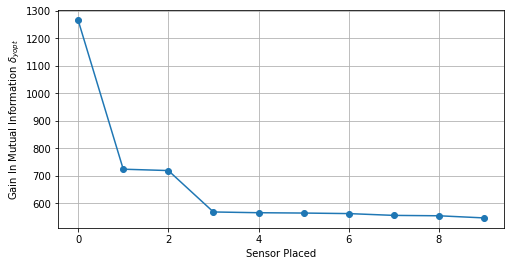

In [34]:
plt.figure(figsize=(8,4))
plt.plot(np.array(list(A_opt['local_eps_72'][1] .values())).flatten(),'-o')

plt.grid()
plt.ylabel("Gain In Mutual Information $\delta_{yopt}$")
plt.xlabel("Sensor Placed")

Text(0.5, 0, 'Sensor Placed')

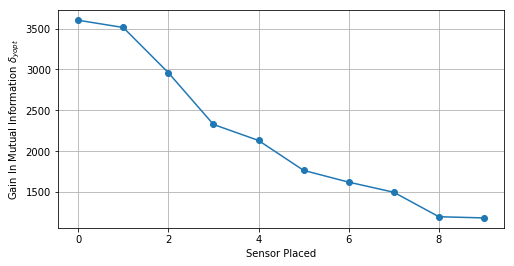

In [73]:
plt.figure(figsize=(8,4))
plt.plot(np.array(list(A_opt['local_eps_72'][1] .values())).flatten(),'-o')

plt.grid()
plt.ylabel("Gain In Mutual Information $\delta_{yopt}$")
plt.xlabel("Sensor Placed")

In [ ]:
A, d_opt = A_opt['local_eps_10^-6'] 
A

In [39]:
A_list = set_to_onehot(A_opt['local_eps_72'][0],data_df.shape[0])
save_vtu(ref_vtu[0],'Opt_3rd_eps_150',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:08:25-16:56:18_Opt_3rd_eps_150.vtu


In [37]:
print(loc_df.loc[A_opt['local_eps_72'][0],:].T.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  72496 &  75832 &  85761 &  86497 &  26107 &  17851 &  36552 &  38178 &  3351  &  36551 \\
\midrule
X & -54.41 & -46.24 & -51.00 & -42.50 & -52.34 & -50.68 & -49.55 & -48.37 & -52.88 & -54.55 \\
Y &  70.39 &  95.22 &  72.66 & 132.29 &  31.07 &  31.96 &  32.72 &  33.31 &  28.94 &  26.82 \\
Z &   8.70 &   3.28 &  29.14 &   1.37 &   1.16 &   0.20 &   1.44 &   0.80 &   0.20 &   0.20 \\
\bottomrule
\end{tabular}



In [47]:
idx_A = [i  for i in range(len(S)) if S[i] in A]
S[idx_A] == np.sort(A)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

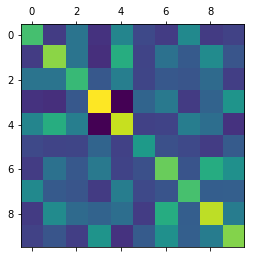

In [62]:
plt.matshow(cov[np.ix_(idx_A,idx_A)])

In [63]:
np.savetxt('Optimal Points/V_oas',scipy.linalg.sqrtm(cov[np.ix_(idx_A,idx_A)]) )

In [59]:
A_old = [38726, 14276, 91348,  5338, 40994, 29626, 65851, 65734,   851, 2293]


In [61]:
dist_set(A_old,A, loc_df)/10

13.84812179921324

In [33]:
A_list = set_to_onehot(A,data_df.shape[0])
save_vtu(ref_vtu,'Opt_3rd_eps_10-6',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:08:13-09:18:03_Opt_3rd_eps_10-6.vtu


In [27]:
d = 1500

In [29]:
A_opt['local'] = sensor_loc_optimisation_naive_local(k,cov, "fixed", d, sets)

Init Loop:   0%|          | 0/23643 [00:00<?, ?it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 1/23643 [00:00<1:12:11,  5.46it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 2/23643 [00:00<1:05:44,  5.99it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 3/23643 [00:00<1:01:07,  6.45it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 4/23643 [00:00<58:00,  6.79it/s]  

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 5/23643 [00:00<55:45,  7.07it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 6/23643 [00:00<54:08,  7.28it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 7/23643 [00:00<52:57,  7.44it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 8/23643 [00:01<52:11,  7.55it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 9/23643 [00:01<51:32,  7.64it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 10/23643 [00:01<51:03,  7.72it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 11/23643 [00:01<50:40,  7.77it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 12/23643 [00:01<50:27,  7.80it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 13/23643 [00:01<50:18,  7.83it/s]

Length of local covariance set : d =  1500 , largest =  [[0.]]  smallest = [[0.]]


Init Loop:   0%|          | 14/23643 [00:01<50:14,  7.84it/s]

Length of local covariance set : d =  10 , largest =  [[0.30274981]]  smallest = [[-0.12215276]]
Length of local covariance set : d =  1500 , largest =  [[0.41373662]]  smallest = [[0.1687729]]



Inner Loop : placing sensor 10:  58%|█████▊    | 13796/23633 [03:09<04:38, 35.38it/s]

Length of local covariance set : d =  10 , largest =  [[0.54027553]]  smallest = [[-0.46475479]]
Length of local covariance set : d =  1500 , largest =  [[0.52865215]]  smallest = [[0.04358664]]



Inner Loop : placing sensor 10:  58%|█████▊    | 13803/23633 [03:09<04:51, 33.67it/s]

Length of local covariance set : d =  10 , largest =  [[0.57244502]]  smallest = [[-0.05548374]]
Length of local covariance set : d =  1500 , largest =  [[0.60465796]]  smallest = [[0.12839824]]



Inner Loop : placing sensor 10:  58%|█████▊    | 13814/23633 [03:10<04:25, 36.93it/s]

Length of local covariance set : d =  10 , largest =  [[0.51783182]]  smallest = [[-0.18363716]]
Length of local covariance set : d =  1500 , largest =  [[0.59649114]]  smallest = [[0.07617548]]



Inner Loop : placing sensor 10:  58%|█████▊    | 13819/23633 [03:10<05:21, 30.51it/s]

Length of local covariance set : d =  10 , largest =  [[0.3310235]]  smallest = [[-0.04050324]]
Length of local covariance set : d =  1500 , largest =  [[0.34016959]]  smallest = [[0.16541603]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13844/23633 [03:10<04:12, 38.75it/s]

Length of local covariance set : d =  10 , largest =  [[0.26160142]]  smallest = [[-0.08738278]]
Length of local covariance set : d =  1500 , largest =  [[0.27856162]]  smallest = [[0.10426817]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13850/23633 [03:10<04:50, 33.68it/s]

Length of local covariance set : d =  10 , largest =  [[0.16912241]]  smallest = [[-0.10945697]]
Length of local covariance set : d =  1500 , largest =  [[0.2601461]]  smallest = [[0.04928444]]
Length of local covariance set : d =  10 , largest =  [[0.16027545]]  smallest = [[-0.18198048]]
Length of local covariance set : d =  1500 , largest =  [[0.2252526]]  smallest = [[0.03992482]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13855/23633 [03:11<07:48, 20.86it/s]

Length of local covariance set : d =  10 , largest =  [[0.13639329]]  smallest = [[-0.15445659]]
Length of local covariance set : d =  1500 , largest =  [[0.16960536]]  smallest = [[0.03799507]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13859/23633 [03:11<08:19, 19.58it/s]

Length of local covariance set : d =  10 , largest =  [[0.50666724]]  smallest = [[-0.04506847]]
Length of local covariance set : d =  1500 , largest =  [[0.60997637]]  smallest = [[0.16831819]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13867/23633 [03:11<07:12, 22.56it/s]

Length of local covariance set : d =  10 , largest =  [[0.36394487]]  smallest = [[-0.10243482]]
Length of local covariance set : d =  1500 , largest =  [[0.41687064]]  smallest = [[0.0897063]]



Inner Loop : placing sensor 10:  59%|█████▊    | 13871/23633 [03:11<07:46, 20.91it/s]

Length of local covariance set : d =  10 , largest =  [[0.21535326]]  smallest = [[-0.08002491]]
Length of local covariance set : d =  1500 , largest =  [[0.26906942]]  smallest = [[0.12036273]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13922/23633 [03:12<05:39, 28.57it/s]

Length of local covariance set : d =  10 , largest =  [[0.10613224]]  smallest = [[-0.06609756]]
Length of local covariance set : d =  1500 , largest =  [[0.11876879]]  smallest = [[0.03450501]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13933/23633 [03:12<04:58, 32.45it/s]

Length of local covariance set : d =  10 , largest =  [[0.10796103]]  smallest = [[-0.07853878]]
Length of local covariance set : d =  1500 , largest =  [[0.11474338]]  smallest = [[0.02870368]]
Length of local covariance set : d =  10 , largest =  [[0.19203954]]  smallest = [[-0.05270429]]
Length of local covariance set : d =  1500 , largest =  [[0.2128574]]  smallest = [[0.08609399]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13940/23633 [03:12<06:38, 24.32it/s]

Length of local covariance set : d =  10 , largest =  [[0.31171988]]  smallest = [[-0.14177212]]
Length of local covariance set : d =  1500 , largest =  [[0.38968556]]  smallest = [[0.04998317]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13950/23633 [03:13<05:52, 27.45it/s]

Length of local covariance set : d =  10 , largest =  [[0.46395276]]  smallest = [[-0.35167351]]
Length of local covariance set : d =  1500 , largest =  [[0.53066565]]  smallest = [[0.0470507]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13955/23633 [03:13<06:23, 25.22it/s]

Length of local covariance set : d =  10 , largest =  [[0.09806723]]  smallest = [[-0.10145834]]
Length of local covariance set : d =  1500 , largest =  [[0.12124828]]  smallest = [[0.04783554]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13963/23633 [03:13<05:51, 27.51it/s]

Length of local covariance set : d =  10 , largest =  [[0.36867278]]  smallest = [[-0.01428464]]
Length of local covariance set : d =  1500 , largest =  [[0.43420401]]  smallest = [[0.21350244]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13974/23633 [03:13<05:06, 31.53it/s]

Length of local covariance set : d =  10 , largest =  [[0.06865454]]  smallest = [[-0.08566779]]
Length of local covariance set : d =  1500 , largest =  [[0.07762155]]  smallest = [[0.02220189]]



Inner Loop : placing sensor 10:  59%|█████▉    | 13983/23633 [03:14<04:49, 33.36it/s]

Length of local covariance set : d =  10 , largest =  [[0.11965382]]  smallest = [[-0.1234879]]
Length of local covariance set : d =  1500 , largest =  [[0.15078449]]  smallest = [[0.05330648]]



Inner Loop : placing sensor 10:  59%|█████▉    | 14000/23633 [03:14<04:02, 39.77it/s]

Length of local covariance set : d =  10 , largest =  [[0.26949554]]  smallest = [[-0.05133307]]
Length of local covariance set : d =  1500 , largest =  [[0.26527153]]  smallest = [[0.10543927]]



Inner Loop : placing sensor 10:  59%|█████▉    | 14025/23633 [03:14<03:16, 48.80it/s]

Length of local covariance set : d =  10 , largest =  [[0.07984087]]  smallest = [[-0.06295174]]
Length of local covariance set : d =  1500 , largest =  [[0.10750635]]  smallest = [[0.05271643]]
Length of local covariance set : d =  10 , largest =  [[0.10133932]]  smallest = [[-0.20655393]]
Length of local covariance set : d =  1500 , largest =  [[0.10739928]]  smallest = [[0.02083079]]



Inner Loop : placing sensor 10:  59%|█████▉    | 14032/23633 [03:14<05:25, 29.51it/s]

Length of local covariance set : d =  10 , largest =  [[0.1542409]]  smallest = [[-0.05576728]]
Length of local covariance set : d =  1500 , largest =  [[0.17219799]]  smallest = [[0.07693223]]



Inner Loop : placing sensor 10:  59%|█████▉    | 14044/23633 [03:15<04:43, 33.79it/s]

Length of local covariance set : d =  10 , largest =  [[0.10062672]]  smallest = [[-0.12614009]]
Length of local covariance set : d =  1500 , largest =  [[0.09753316]]  smallest = [[0.01926568]]



Inner Loop : placing sensor 10:  59%|█████▉    | 14055/23633 [03:15<04:20, 36.81it/s]

Length of local covariance set : d =  10 , largest =  [[0.53501559]]  smallest = [[-0.05767168]]
Length of local covariance set : d =  1500 , largest =  [[0.59103542]]  smallest = [[0.16169737]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14072/23633 [03:15<03:41, 43.18it/s]

Length of local covariance set : d =  10 , largest =  [[0.08249781]]  smallest = [[-0.06717319]]
Length of local covariance set : d =  1500 , largest =  [[0.12800586]]  smallest = [[0.06006607]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14085/23633 [03:15<03:25, 46.38it/s]

Length of local covariance set : d =  10 , largest =  [[0.1309389]]  smallest = [[0.01956671]]
Length of local covariance set : d =  1500 , largest =  [[0.13272112]]  smallest = [[0.05380538]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14103/23633 [03:16<03:01, 52.38it/s]

Length of local covariance set : d =  10 , largest =  [[0.21486684]]  smallest = [[-0.09402773]]
Length of local covariance set : d =  1500 , largest =  [[0.22016661]]  smallest = [[0.04790931]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14117/23633 [03:16<02:56, 54.07it/s]

Length of local covariance set : d =  10 , largest =  [[0.48404203]]  smallest = [[-0.08941359]]
Length of local covariance set : d =  1500 , largest =  [[0.49208499]]  smallest = [[0.17163935]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14124/23633 [03:16<03:37, 43.68it/s]

Length of local covariance set : d =  10 , largest =  [[0.20609613]]  smallest = [[-0.08063424]]
Length of local covariance set : d =  1500 , largest =  [[0.21124219]]  smallest = [[0.04908798]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14141/23633 [03:16<03:13, 49.09it/s]

Length of local covariance set : d =  10 , largest =  [[0.26236772]]  smallest = [[-0.12543257]]
Length of local covariance set : d =  1500 , largest =  [[0.27419169]]  smallest = [[0.04411409]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14147/23633 [03:17<04:06, 38.41it/s]

Length of local covariance set : d =  10 , largest =  [[0.20549547]]  smallest = [[-0.12492871]]
Length of local covariance set : d =  1500 , largest =  [[0.21006922]]  smallest = [[0.06797448]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14152/23633 [03:17<05:08, 30.77it/s]

Length of local covariance set : d =  10 , largest =  [[0.0929167]]  smallest = [[-0.18117815]]
Length of local covariance set : d =  1500 , largest =  [[0.26012918]]  smallest = [[0.02180908]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14160/23633 [03:17<05:10, 30.49it/s]

Length of local covariance set : d =  10 , largest =  [[0.25802418]]  smallest = [[-0.12273152]]
Length of local covariance set : d =  1500 , largest =  [[0.26252448]]  smallest = [[0.05562739]]



Inner Loop : placing sensor 10:  60%|█████▉    | 14175/23633 [03:17<04:23, 35.89it/s]

Length of local covariance set : d =  10 , largest =  [[0.42089029]]  smallest = [[-0.29810057]]
Length of local covariance set : d =  1500 , largest =  [[0.51912071]]  smallest = [[0.17367415]]



Inner Loop : placing sensor 10:  60%|██████    | 14185/23633 [03:18<04:12, 37.49it/s]

Length of local covariance set : d =  10 , largest =  [[0.06224838]]  smallest = [[-0.00676827]]
Length of local covariance set : d =  1500 , largest =  [[0.12153858]]  smallest = [[0.05196114]]



Inner Loop : placing sensor 10:  60%|██████    | 14201/23633 [03:18<03:37, 43.29it/s]

Length of local covariance set : d =  10 , largest =  [[0.26457332]]  smallest = [[-0.11328641]]
Length of local covariance set : d =  1500 , largest =  [[0.29922622]]  smallest = [[0.12262201]]



Inner Loop : placing sensor 10:  60%|██████    | 14215/23633 [03:18<03:19, 47.23it/s]

Length of local covariance set : d =  10 , largest =  [[0.54492111]]  smallest = [[-0.6751463]]
Length of local covariance set : d =  1500 , largest =  [[0.57896016]]  smallest = [[0.00875287]]



Inner Loop : placing sensor 10:  60%|██████    | 14221/23633 [03:18<04:20, 36.15it/s]

Length of local covariance set : d =  10 , largest =  [[0.71068794]]  smallest = [[-0.14869289]]
Length of local covariance set : d =  1500 , largest =  [[0.7343475]]  smallest = [[0.28236582]]



Inner Loop : placing sensor 10:  60%|██████    | 14237/23633 [03:19<03:44, 41.89it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
A_opt['local']

KeyError: 'local'

In [37]:
A_opt['lazy'] = sensor_loc_optimisation_lazy(k,Z, sets, tau)

NameError: name 'tau' is not defined

In [38]:
A_opt['naive'] = sensor_loc_optimisation_naive(k,Z, sets)

IndexError: index 991 is out of bounds for axis 1 with size 989

In [ ]:
A_opt['lazy'] 

In [ ]:
A_opt['naive']

In [138]:
S = np.random.random_integers(0,300,size=(10,1))

In [139]:
n_S = len(S)

In [23]:
"Inner Loop : placing sensor " + str(10+1)

'Inner Loop : placing sensor 11'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[[225], [230], [244], [112], [246], [28], [144], [238], [269], [213]]

In [158]:
y_opt = max(delta_y, key=delta_y.get)

In [161]:
delta_y.pop(y_opt)

KeyError: 230

In [58]:
A_opt['local_weird']  = A_opt['local'] 

In [61]:
A_opt['local_weird']


array([56588, 19615, 34380, 10357, 19782])

In [79]:
A_list = set_to_onehot(A_opt['local'] ,data_df.shape[0])
save_vtu(ref_vtu[0],'Opt10Alg3_d1500',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:08:06-08:59:56_Opt10Alg3_d1500.vtu


In [62]:
A_opt['local'] 

array([56588, 19615, 34380, 10357, 19782])

In [64]:
loc_df.loc[A_opt['local'] ]

,X,Y,Z
56588,41.612950,27.211039,16.725003
19615,63.921767,39.719012,1.082953
34380,30.229359,26.034682,12.134716
10357,62.126762,45.229813,1.635897
19782,38.747350,35.258986,1.799108


In [76]:
A_opt['local']

array([56588, 19615, 34380, 10357, 19782, 43278, 32853, 43412,  7183,
        3903])

In [78]:
loc_df.loc[A_opt['local'] ]


,X,Y,Z
56588,41.612950,27.211039,16.725003
19615,63.921767,39.719012,1.082953
34380,30.229359,26.034682,12.134716
10357,62.126762,45.229813,1.635897
19782,38.747350,35.258986,1.799108
43278,22.790898,25.805409,11.790776
32853,44.412793,27.800441,13.329639
43412,88.711423,34.401510,1.571618
7183,41.743593,25.301994,16.358769
3903,62.005233,32.392064,0.200000


In [34]:
A_opt['local']

array([81550, 86137, 53023, 89645, 31242, 74747, 75365, 94922, 69400,
       76804])

In [35]:
loc_df.loc[A_opt['local'] ]


,X,Y,Z
81550,52.162609,7.168467,18.073831
86137,96.775958,-22.509566,16.296312
53023,79.540660,13.416436,15.959366
89645,-20.057211,61.532293,1.657884
31242,63.412238,-21.778940,14.204823
74747,32.474678,59.026049,15.260693
75365,-7.028223,52.244737,28.096950
94922,-47.040150,111.871979,29.891247
69400,88.747522,-5.898881,17.332782
76804,95.385331,-25.280805,8.666528


In [37]:
np.savetxt('data_assimilation/subset.txt',S)

In [42]:
A_TSVD = [38726, 14276, 91348,  5338, 40994, 29626, 65851, 65734,   851,
        2293]

In [43]:
A_opt['local']

KeyError: 'local'

In [44]:
A_opt_3rd_eps = [56588, 19615, 34380, 10357, 19782, 43278, 32853, 43412,  7183,
        3903]

In [46]:
dist_set(A_opt_3rd_eps, A_TSVD,loc_df)/10

14.906497896884712